In [1]:
import pandas as pd
import datetime
from datetime import timedelta
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [28]:
df=pd.read_excel("ContouringAndPlanningTimeEst.xlsx")
df.head()

Unnamed: 0    MRN CreatedDate          SiteGroup        Sitegroup_y  \
0           0   7287  2019-02-20  GENITOURINARY(GU)  GENITOURINARY(GU)   
1           1   7287  2019-05-29  GENITOURINARY(GU)  GENITOURINARY(GU)   
2           2   7287  2019-07-31  GENITOURINARY(GU)  GENITOURINARY(GU)   
3           3   7287  2019-08-28  GENITOURINARY(GU)  GENITOURINARY(GU)   
4           4  10287  2019-04-17             BREAST             BREAST   

   Category_x  SimApptDt GTV/CTVPromtDate GTV/CTVCompleteDate  \
0    Urgent 2  2019-2-20       2019-02-20          2019-02-20   
1  Standard 3   2019-6-5       2019-06-05          2019-06-05   
2    Urgent 2  2019-7-31              NaT                 NaT   
3    Urgent 2  2019-8-28              NaT                 NaT   
4  Standard 3  2019-4-30       2019-05-01          2019-05-01   

  ReviewDatePlaner  ... WaitTime ContourDur+1 checkContourFinish Before Tx  \
0              NaT  ...        1          1.0                         -1.0   
1              NaT  ...        7          1.0                          0.0   
2              NaT  ...        6          NaN                          NaN   
3              NaT  ...        1          NaN                          NaN   
4       2019-05-07  ...       26          1.0                         -6.0   

  PlanDur Unnamed: 18  ProgressReviewWait  PlannerReviewWait  Unnamed: 21  \
0     0.0         NaN                 NaN                NaN          NaN   
1     0.0         NaN                 NaN                NaN          NaN   
2     NaN         NaN                 NaN                NaN          NaN   
3     NaN         NaN                 NaN                NaN          NaN   
4     0.0         NaN                 4.0                5.0          5.0   

   TltDose  TxFracs  
0   1600.0      2.0  
1   2400.0      3.0  
2   2500.0     10.0  
3   1600.0      2.0  
4   4240.0     16.0  

[5 rows x 25 columns]

In [29]:
df.shape

(10306, 25)

In [30]:
df['Category_x'].unique()

array(['Urgent 2', 'Standard 3', 'Emergency 1', 'Planned Delay 3'],
      dtype=object)

In [31]:
#df.to_excel("master_file_final.xlsx")

In [32]:
# exclude planned delays
df=df[df['Category_x']!='Planned Delay 3']
#df=df[df['Category_x']!='planned Delay 3']


## Pre-treatment steps time analysis

In [33]:
# remove outliers by total wait time
from scipy import stats
df['z_score']=stats.zscore(df['WaitTime'])
df=df.loc[df['z_score'].abs()<=3]
df.head()

Unnamed: 0    MRN CreatedDate          SiteGroup        Sitegroup_y  \
0           0   7287  2019-02-20  GENITOURINARY(GU)  GENITOURINARY(GU)   
1           1   7287  2019-05-29  GENITOURINARY(GU)  GENITOURINARY(GU)   
2           2   7287  2019-07-31  GENITOURINARY(GU)  GENITOURINARY(GU)   
3           3   7287  2019-08-28  GENITOURINARY(GU)  GENITOURINARY(GU)   
4           4  10287  2019-04-17             BREAST             BREAST   

   Category_x  SimApptDt GTV/CTVPromtDate GTV/CTVCompleteDate  \
0    Urgent 2  2019-2-20       2019-02-20          2019-02-20   
1  Standard 3   2019-6-5       2019-06-05          2019-06-05   
2    Urgent 2  2019-7-31              NaT                 NaT   
3    Urgent 2  2019-8-28              NaT                 NaT   
4  Standard 3  2019-4-30       2019-05-01          2019-05-01   

  ReviewDatePlaner  ... ContourDur+1 checkContourFinish Before Tx PlanDur  \
0              NaT  ...          1.0                         -1.0     0.0   
1              NaT  ...          1.0                          0.0     0.0   
2              NaT  ...          NaN                          NaN     NaN   
3              NaT  ...          NaN                          NaN     NaN   
4       2019-05-07  ...          1.0                         -6.0     0.0   

  Unnamed: 18 ProgressReviewWait  PlannerReviewWait  Unnamed: 21  TltDose  \
0         NaN                NaN                NaN          NaN   1600.0   
1         NaN                NaN                NaN          NaN   2400.0   
2         NaN                NaN                NaN          NaN   2500.0   
3         NaN                NaN                NaN          NaN   1600.0   
4         NaN                4.0                5.0          5.0   4240.0   

   TxFracs   z_score  
0      2.0 -0.992718  
1      3.0 -0.471982  
2     10.0 -0.558771  
3      2.0 -0.992718  
4     16.0  1.177017  

[5 rows x 26 columns]

### Wait time > 14 days:

In [13]:
df_exceed=preTxDur[(df['TotalWaitTime']>14)&(df['Category_x']!='Planned Delay 3')&(df['Category_x']!='planned Delay 3')]
df_exceed.shape

(16033, 35)

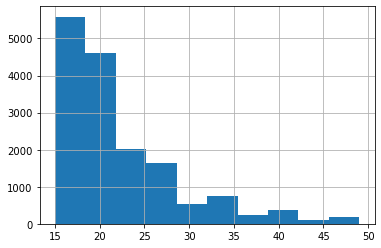

In [14]:
df_exceed['TotalWaitTime'].hist()

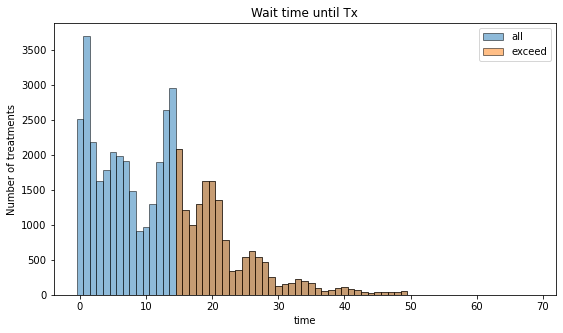

In [15]:
plt.figure(figsize=[9,5])
bins = range(0,70)

x = preTxDur['TotalWaitTime']
y = df_exceed['TotalWaitTime']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time until Tx')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [16]:
preTxDur.groupby(by=['SiteGroup']).count()

MRN  CreatedDate  Diagnosis  Category_x  PlanCreateDate  Team  \
SiteGroup                                                                     
Breast       7990         7990       7942        7984            7990  7989   
CNS          4031         4031       4023        4030            4031  4030   
Endocrine     725          725        720         725             725   725   
Eye           612          612        612         612             612   612   
GI Lower     1926         1926       1920        1924            1926  1926   
GI Upper     2892         2892       2883        2889            2892  2892   
GU           5214         5214       5214        5212            5214  5214   
GYNae           5            5          5           5               5     5   
Gynae        2632         2632       2614        2631            2632  2630   
Head & Neck  4862         4862       4862        4861            4862  4862   
Lung         7674         7674       7674        7672            7674  7673   
Lymphoma     3462         3462       3443        3462            3462  3462   
Oligomets      35           35         35          35              35    34   
PAIN            1            1          0           1               1     1   
Paediatrics   979          979        972         979             979   979   
Sarcoma      2305         2305       2298        2305            2305  2305   
Skin          584          584        584         584             584   584   
Unknown         2            2          2           2               2     2   
breast         13           13         13          13              13    13   
cNS             1            1          1           1               1     1   
cns             1            1          1           1               1     1   
eye             1            1          1           1               1     1   
gynae           5            5          5           5               5     5   
head & Neck     1            1          1           1               1     1   
lung           12           12         12          12              12    12   
lymphoma        1            1          1           1               1     1   

             GTV/CTVPromtDate  GTV/CTVCompleteDate  ReviewDatePlaner  \
SiteGroup                                                              
Breast                   6742                 6056              5730   
CNS                      3040                 2899              2664   
Endocrine                 637                  576               370   
Eye                       528                  502               455   
GI Lower                 1711                 1573              1149   
GI Upper                 2460                 2261              1692   
GU                       4308                 3881              1337   
GYNae                       5                    4                 2   
Gynae                    2413                 2245              1648   
Head & Neck              4673                 4615              2590   
Lung                     5909                 4947              3065   
Lymphoma                 2856                 2692              1735   
Oligomets                  34                   32                35   
PAIN                        1                    1                 1   
Paediatrics               803                  778               512   
Sarcoma                  2143                 2062              1815   
Skin                      431                  384               252   
Unknown                     1                    1                 0   
breast                     11                    9                 6   
cNS                         0                    0                 0   
cns                         1                    1                 1   
eye                         0                    0                 0   
gynae                       5                    4                 5   
h

In [17]:
df_exceed.groupby(by=['SiteGroup']).count()

MRN  CreatedDate  Diagnosis  Category_x  PlanCreateDate  Team  \
SiteGroup                                                                     
Breast       3368         3368       3344        3364            3368  3368   
CNS           800          800        800         799             800   799   
Endocrine     176          176        175         176             176   176   
Eye           149          149        149         149             149   149   
GI Lower      859          859        858         858             859   859   
GI Upper     1231         1231       1226        1230            1231  1231   
GU           2016         2016       2016        2015            2016  2016   
GYNae           4            4          4           4               4     4   
Gynae         977          977        974         977             977   976   
Head & Neck  2952         2952       2952        2951            2952  2952   
Lung         1684         1684       1684        1684            1684  1684   
Lymphoma      631          631        627         631             631   631   
Oligomets      27           27         27          27              27    26   
PAIN            1            1          0           1               1     1   
Paediatrics   271          271        268         271             271   271   
Sarcoma       786          786        782         786             786   786   
Skin           93           93         93          93              93    93   
breast          2            2          2           2               2     2   
gynae           2            2          2           2               2     2   
head & Neck     1            1          1           1               1     1   
lung            2            2          2           2               2     2   
lymphoma        1            1          1           1               1     1   

             GTV/CTVPromtDate  GTV/CTVCompleteDate  ReviewDatePlaner  \
SiteGroup                                                              
Breast                   3161                 2919              3192   
CNS                       687                  701               585   
Endocrine                 170                  167               158   
Eye                       136                  136               146   
GI Lower                  844                  838               764   
GI Upper                 1193                 1158              1155   
GU                       1977                 1964               781   
GYNae                       4                    4                 2   
Gynae                     953                  922               818   
Head & Neck              2926                 2926              1847   
Lung                     1594                 1521              1556   
Lymphoma                  531                  527               509   
Oligomets                  27                   25                27   
PAIN                        1                    1                 1   
Paediatrics               224                  221               155   
Sarcoma                   769                  769               759   
Skin                       89                   88                78   
breast                      2                    2                 2   
gynae                       2                    2                 2   
head & Neck                 1                    1                 0   
lung                        2                    1                 2   
lymphoma                    1                    1                 1   

             Location_x  ...  TxUnit  Intent  TotalWaitTime  ContourDur  \
SiteGroup                ...                                              
Breast             3368  ...    3366    3227           3368        2890   
CNS                 800  ...     797     772            800         674   
Endocrine           176  ...     176     174            176         165   
Eye          

In [18]:
df_focus = df_exceed.loc[df_exceed['SiteGroup'].isin(['Brease','Gynae','Head & Neck'])]
df_focus

MRN CreatedDate    SiteGroup                Diagnosis  Category_x  \
13       12169  2020-08-25        Gynae                    Vulva  Standard 3   
32       27912  2012-12-20  Head & Neck                   Larynx  Standard 3   
58       51014  2010-02-10        Gynae                  Uterine  Standard 3   
65       59641  2012-02-10  Head & Neck  Salivary Glands (Major)  Standard 3   
118      89757  2010-11-19        Gynae        Unknown Diagnosis  Standard 3   
...        ...         ...          ...                      ...         ...   
57722  6208538  2019-03-27  Head & Neck                    Other  Standard 3   
57728  6238191  2020-05-28  Head & Neck              Oral Cavity  Standard 3   
57729  6242668  2013-11-28  Head & Neck                   Larynx  Standard 3   
57746  6321264  2015-03-03  Head & Neck       Distant Metastasis  Standard 3   
57762  6386250  2013-11-22  Head & Neck                     Skin  Standard 3   

      PlanCreateDate  Team GTV/CTVPromtDate GTV/CTVCompleteDate  \
13        2020-08-25   3.0       2020-08-31          2020-09-03   
32        2012-12-20   1.0       2012-12-31          2013-01-04   
58        2010-02-10   3.0       2010-02-16                 NaT   
65        2012-02-10   1.0       2012-02-15          2012-02-20   
118       2010-11-19   3.0       2010-11-25          2010-12-02   
...              ...   ...              ...                 ...   
57722     2019-03-27   1.0       2019-04-02          2019-04-05   
57728     2020-05-28   1.0       2020-06-02          2020-06-05   
57729     2013-11-28   1.0       2013-12-06          2013-12-31   
57746     2015-03-03   1.0       2015-03-09          2015-03-12   
57762     2013-11-22   1.0       2013-11-29          2013-12-03   

      ReviewDatePlaner  ...    TxUnit              Intent TotalWaitTime  \
13          2020-09-09  ...      WA15  Complex Palliative            16   
32          2013-01-04  ...      ES05            Curative            25   
58          2010-02-23  ...  OLD-SV01            Adjuvant            20   
65          2012-02-21  ...  OLD-ES07            Curative            19   
118         2010-12-03  ...      NS12  Complex Palliative            19   
...                ...  ...       ...                 ...           ...   
57722              NaT  ...      SV01         Neoadjuvant            16   
57728              NaT  ...      SV03            Adjuvant            15   
57729              NaT  ...      SA04            Curative            19   
57746              NaT  ...      SV03  Complex Palliative            15   
57762              NaT  ...      SV03            Curative            18   

      ContourDur TimeBtw_Sim_ContourCompl TimeBtw_Sim_BkTx Tx-TxBook PlanDur  \
13           3.0                      3.0                9         1     0.0   
32           4.0                      4.0                7         7     NaN   
58           NaN                      NaN                7         7     NaN   
65           5.0                      5.0                6         8     NaN   
118          7.0                      7.0                8         5     NaN   
...          ...                      ...              ...       ...     ...   
57722        3.0                      3.0               -1        11     1.0   
57728        3.0                      3.0               -5        15     0.0   
57729       25.0                     25.0               -7        18     NaN   
57746        3.0                      3.0               -6        15     1.0   
57762        4.0                      4.0               -4        15     2.0   

      ContourWait  TxApptBook-Sim  
13         0 days               9  
32         0 days               7  
58         0 days               7  
65         0 days               6  
118        0 days               8  
...           ...             ...  
57722      0 days              -1  
57728      0 days              -5  
57729      0 days              -7  
57746      0 days      

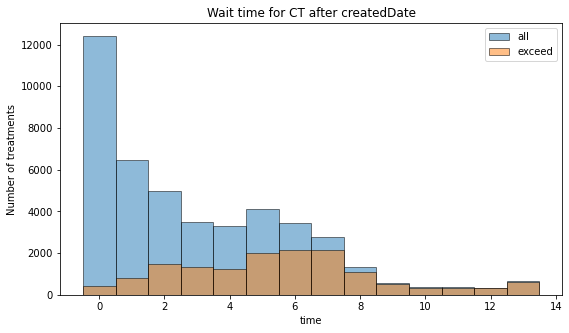

In [19]:
plt.figure(figsize=[9,5])
bins = range(0,15)

x = preTxDur['CTWait']
y = df_exceed['CTWait']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time for CT after createdDate')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Contouring wait time seems to be negligible:

In [20]:
preTxDur[preTxDur['ContourWait'].dt.days>1].groupby('SiteGroup').count()

MRN  CreatedDate  Diagnosis  Category_x  PlanCreateDate  Team  \
SiteGroup                                                                     
Breast       1355         1355       1342        1354            1355  1355   
CNS           178          178        178         178             178   178   
Endocrine      23           23         23          23              23    23   
Eye            15           15         15          15              15    15   
GI Lower      145          145        145         145             145   145   
GI Upper      222          222        221         222             222   222   
GU            441          441        441         441             441   441   
Gynae         232          232        231         232             232   231   
Head & Neck   141          141        141         141             141   141   
Lung          430          430        430         430             430   430   
Lymphoma       87           87         86          87              87    87   
Oligomets       5            5          5           5               5     5   
PAIN            1            1          0           1               1     1   
Paediatrics    35           35         35          35              35    35   
Sarcoma       103          103        103         103             103   103   
Skin           18           18         18          18              18    18   
breast          3            3          3           3               3     3   
head & Neck     1            1          1           1               1     1   
lung            1            1          1           1               1     1   

             GTV/CTVPromtDate  GTV/CTVCompleteDate  ReviewDatePlaner  \
SiteGroup                                                              
Breast                   1355                 1261              1298   
CNS                       178                  166               131   
Endocrine                  23                   20                21   
Eye                        15                   15                14   
GI Lower                  145                  141               115   
GI Upper                  222                  213               199   
GU                        441                  433               190   
Gynae                     232                  224               186   
Head & Neck               141                  139                84   
Lung                      430                  374               341   
Lymphoma                   87                   82                61   
Oligomets                   5                    5                 5   
PAIN                        1                    1                 1   
Paediatrics                35                   35                22   
Sarcoma                   103                  101                95   
Skin                       18                   17                14   
breast                      3                    3                 2   
head & Neck                 1                    1                 0   
lung                        1                    0                 1   

             Location_x  ...  TxUnit  Intent  TotalWaitTime  ContourDur  \
SiteGroup                ...                                              
Breast             1355  ...    1355    1310           1355        1261   
CNS                 178  ...     178     170            178         166   
Endocrine            23  ...      23      22             23          20   
Eye                  15  ...      15      15             15          15   
GI Lower            145  ...     145     140            145         141   
GI Upper            222  ...     222     217            222         213   
GU                  441  ...     441     432            441         433   
Gynae               232  ...     232     227            232         224   
Head & Neck         141  ...     141     139            141         139   
Lung            

In [21]:
df_exceed.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim'],
      dtype='object')

<ipython-input-22-eaf9d57fffc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_exceed['ContourWait']=df_exceed['ContourWait'].dt.days


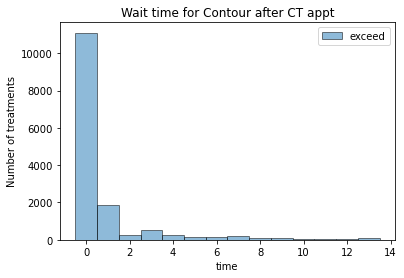

In [22]:
df_exceed['ContourWait']=df_exceed['ContourWait'].dt.days
y = df_exceed[(df_exceed['ContourWait']>=-20)&(df_exceed['ContourWait']<=15)].ContourWait
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')

plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Wait time for Contour after CT appt')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

### Contouring Time:

In [34]:
# remove outliers by contouring time
df['ContourDur']=df['ContourDur+1']-1
df['z_score_contour']=stats.zscore(df['ContourDur'])
df.loc[df['z_score_contour'].abs()<=3]
preTxDur=df

In [35]:
df_exceed=df[df['WaitTime']>14]

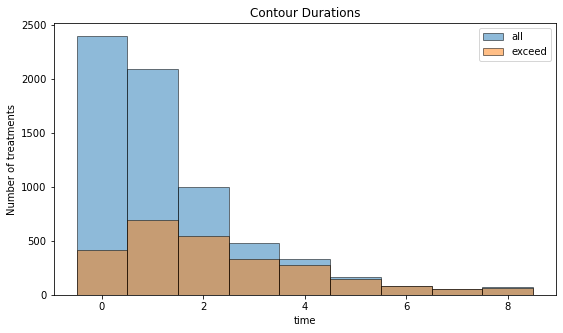

In [36]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['ContourDur']>=-20)&(preTxDur['ContourDur']<=20)]['ContourDur']
y = df_exceed[(df_exceed['ContourDur']>=-20)&(df_exceed['ContourDur']<=20)]['ContourDur']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Contour Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [37]:
preTxDur.columns

Index(['Unnamed: 0', 'MRN', 'CreatedDate', 'SiteGroup', 'Sitegroup_y',
       'Category_x', 'SimApptDt', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'FinalPlanPromtDate', 'FinalPlanCompleteDate',
       'PlanProgressReviewDate', 'TxStartDt', 'Intent', 'WaitTime',
       'ContourDur+1', 'checkContourFinish Before Tx', 'PlanDur',
       'Unnamed: 18', 'ProgressReviewWait', 'PlannerReviewWait', 'Unnamed: 21',
       'TltDose', 'TxFracs', 'z_score', 'ContourDur', 'z_score_contour'],
      dtype='object')

In [38]:
df_seeContr = preTxDur[['MRN','Category_x','CreatedDate','ContourDur','TimeBtw_Sim_ContourCompl','TxApptBook-Sim',
                       'SimApptDt','GTV/CTVCompleteDate','TxApptCreatedDt','ReviewDatePlaner','TxStartDt']]
df_seeContr['diff']=df_seeContr['TimeBtw_Sim_ContourCompl']-df_seeContr['ContourDur']
#df_seeContr[(df_seeContr['diff']!=0)&(df_seeContr['diff'].notnull())]
df_seeContr[df_seeContr['ReviewDatePlaner'].notnull()]

KeyError: "['TimeBtw_Sim_ContourCompl', 'TxApptCreatedDt', 'TxApptBook-Sim'] not in index"

#### Yearly Contouring trends

In [39]:
df['Sitegroup_y'].unique()

array(['GENITOURINARY(GU)', 'BREAST', 'GASTROINTESTINAL(GI)', 'GYNAE',
       'SARCOMA', 'ENT (HEAD & NECK)', 'LUNG', 'CNS', 'SKIN', 'LYMPHOMA',
       'EYE', 'LEUKEMIA', 'UNKNOWN', 'ENDOCRINE', nan, 'PAEDIATRIC',
       'NON CANCER DX'], dtype=object)

In [40]:
# breast, 
breast_contour = {}
years_month_list =[]
df_breast = df[df['Sitegroup_y']=='BREAST']
for y in range(2010, 2021): #2010-2020
    df_y = df_breast[df_breast['CreatedDate'].dt.year == y]
    
    for m in range(1,13):
        month_avg = df_y[df_y['CreatedDate'].dt.month == m]['TimeBtw_Sim_ContourCompl'].mean()
        years_month_list.append(month_avg)
    #breast_contour[y] = month_list
    

x = range(1,133)
y = years_month_list
plt.plot(x,y)
plt.xticks(np.arange(1, 133, step=12), labels=range(2010,2021))
plt.title("Contouring durations for Breast patients");

KeyError: 'TimeBtw_Sim_ContourCompl'

In [41]:
def remove_outliers(data, m=1):
    return data[abs(data - np.mean(data)) < m * np.std(data)]


In [45]:
def ContourDur_trend(sitegroup):
    site_contour = {}
    years_month_list =[] # ContourComplete - Sim
    years_month_list_2 =[] # ContourDur = ContourComplete - ContourPromt
    years_month_list_3 =[] # TxApptBook - Sim
    df_site = preTxDur[preTxDur['Sitegroup_y']==sitegroup]

    for y in range(2015, 2021): #2015-2020
        df_y = df_site[df_site['CreatedDate'].dt.year == y]
        month_list=[]
        for m in range(1,13):
            #remove outliers in each month
            monthly_data_2 = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur']
            month_avg_2 = remove_outliers(monthly_data_2).mean()
        
            years_month_list_2.append(month_avg_2)
           
        
            #month_list.append(month_avg)
            site_contour[y] = month_list
            #print(site_contour[2018])

    x = range(1,73)
   
    y2 = years_month_list_2


    plt.plot(x,y2,label='ContourDur')
    #plt.plot(x,y3,label='TxApptBook-Sim')
    plt.legend()
    plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
    plt.title("Mean contouring durations for patients " + sitegroup)
    plt.show();
    

In [46]:
df['Sitegroup_y'].unique()

array(['GENITOURINARY(GU)', 'BREAST', 'GASTROINTESTINAL(GI)', 'GYNAE',
       'SARCOMA', 'ENT (HEAD & NECK)', 'LUNG', 'CNS', 'SKIN', 'LYMPHOMA',
       'EYE', 'LEUKEMIA', 'UNKNOWN', 'ENDOCRINE', nan, 'PAEDIATRIC',
       'NON CANCER DX'], dtype=object)

GENITOURINARY(GU)


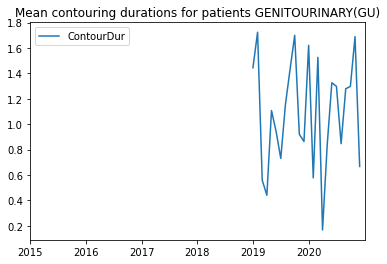

BREAST


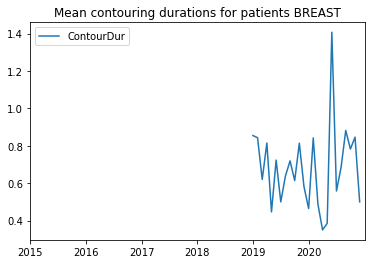

GASTROINTESTINAL(GI)


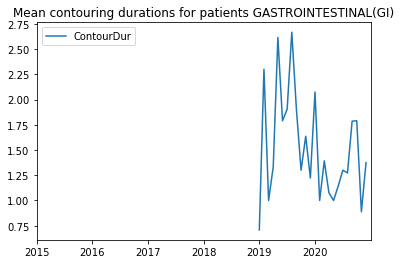

GYNAE


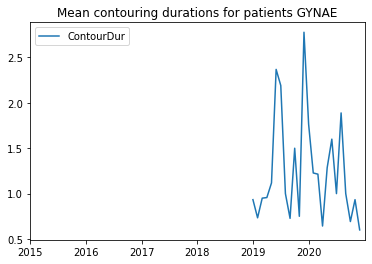

SARCOMA


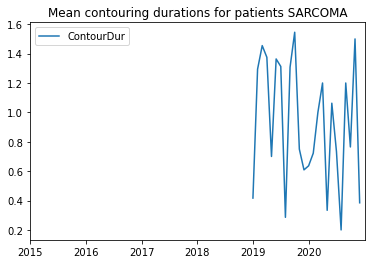

ENT (HEAD & NECK)


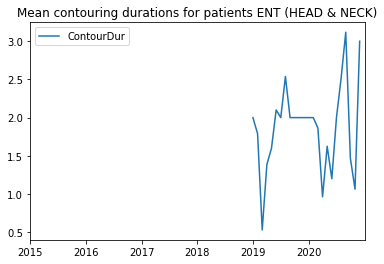

LUNG


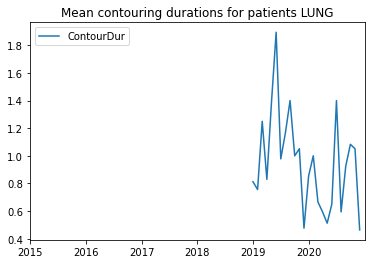

CNS


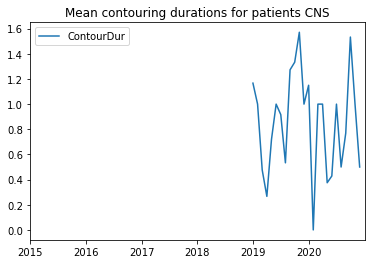

SKIN


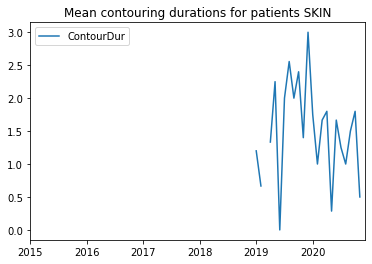

LYMPHOMA


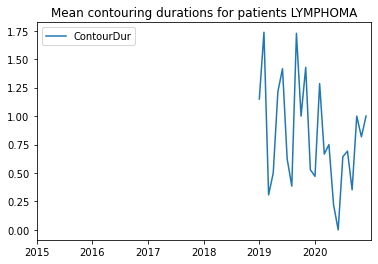

EYE


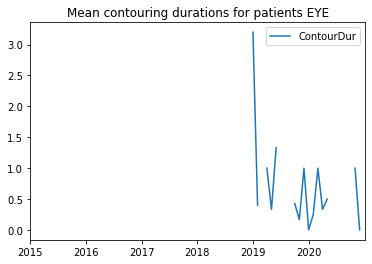

LEUKEMIA


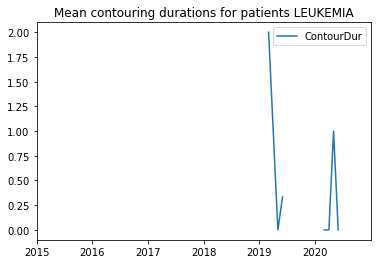

UNKNOWN


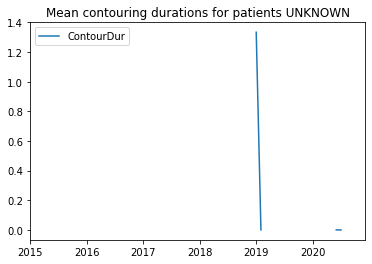

ENDOCRINE


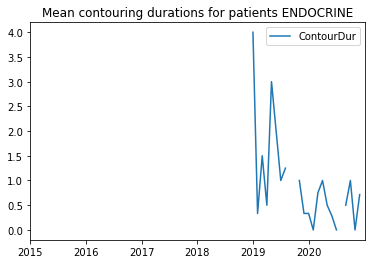

PAEDIATRIC


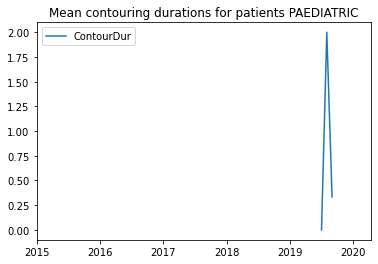

NON CANCER DX


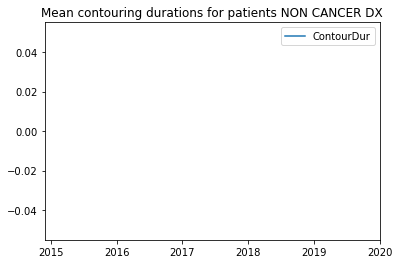

In [47]:
for s in df['Sitegroup_y'].unique():
    if s is not np.nan:
        print(s)
        ContourDur_trend(s)
    

### Contouring time estimation model

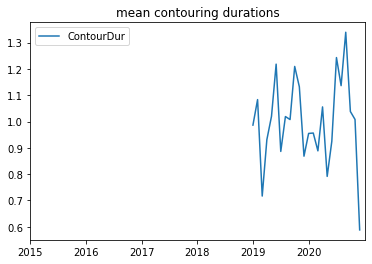

In [49]:
    site_contour = {}
    years_month_list =[] # ContourComplete - Sim
    years_month_list_2 =[] # ContourDur = ContourComplete - ContourPromt
    years_month_list_3 =[] # TxApptBook - Sim

    for y in range(2015, 2021): #2015-2020
        df_y = preTxDur[preTxDur['CreatedDate'].dt.year == y]
        month_list=[]
        for m in range(1,13):
            #remove outliers in each month
            #monthly_data = df_y[df_y['CreatedDate'].dt.month == m]['TimeBtw_Sim_ContourCompl']
            #month_avg = remove_outliers(monthly_data).mean()
            monthly_data_2 = df_y[df_y['CreatedDate'].dt.month == m]['ContourDur']
            month_avg_2 = remove_outliers(monthly_data_2).mean()
            #monthly_data_3 = df_y[df_y['CreatedDate'].dt.month == m]['TxApptBook-Sim']
            #month_avg_3 = remove_outliers(monthly_data_3).mean()
      
            #years_month_list.append(month_avg)
            years_month_list_2.append(month_avg_2)
            #years_month_list_3.append(month_avg_3)
        
            #month_list.append(month_avg)
            site_contour[y] = month_list
            #print(site_contour[2018])

    x = range(1,73)
    #y = years_month_list
    y2 = years_month_list_2
    #y3 = years_month_list_3
    #plt.plot(x,y,label='ContourCompl-Sim')
    plt.plot(x,y2,label='ContourDur')
    #plt.plot(x,y3,label='TxApptBook-Sim')
    plt.legend()
    plt.xticks(np.arange(1, 73, step=12), labels=range(2015,2021))
    plt.title("mean contouring durations")
    plt.show();

In [50]:
preTxDur.columns

Index(['Unnamed: 0', 'MRN', 'CreatedDate', 'SiteGroup', 'Sitegroup_y',
       'Category_x', 'SimApptDt', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'FinalPlanPromtDate', 'FinalPlanCompleteDate',
       'PlanProgressReviewDate', 'TxStartDt', 'Intent', 'WaitTime',
       'ContourDur+1', 'checkContourFinish Before Tx', 'PlanDur',
       'Unnamed: 18', 'ProgressReviewWait', 'PlannerReviewWait', 'Unnamed: 21',
       'TltDose', 'TxFracs', 'z_score', 'ContourDur', 'z_score_contour'],
      dtype='object')

In [51]:
df1920 = preTxDur[pd.to_datetime(preTxDur['CreatedDate']).dt.year>=2019]
df1920.size

226352

### EDA

In [62]:
features = ['SiteGroup','Category_x','TltDose','TxFracs']
dtf = df1920[['MRN'] + features + ['ContourDur']]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
dtf=dtf[(dtf['ContourDur']<=30)&(dtf['ContourDur']>=0)]
dtf.head()


MRN          SiteGroup  Category_x  TltDose  TxFracs  ContourDur
0   7287  GENITOURINARY(GU)    Urgent 2   1600.0      2.0         0.0
1   7287  GENITOURINARY(GU)  Standard 3   2400.0      3.0         0.0
4  10287             BREAST  Standard 3   4240.0     16.0         0.0
6  12169              GYNAE  Standard 3   2500.0     10.0         3.0
7  15820             BREAST  Standard 3   4240.0     16.0         0.0

In [63]:
target_y="TimeBtw_Sim_ContourCompl"
dtf = df1520[features + [target_y]]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
dtf=dtf[(dtf[target_y]<=30)&(dtf[target_y]>=0)]
dtf.head()


NameError: name 'df1520' is not defined

In [64]:
dtf.head()

MRN          SiteGroup  Category_x  TltDose  TxFracs  ContourDur
0   7287  GENITOURINARY(GU)    Urgent 2   1600.0      2.0         0.0
1   7287  GENITOURINARY(GU)  Standard 3   2400.0      3.0         0.0
4  10287             BREAST  Standard 3   4240.0     16.0         0.0
6  12169              GYNAE  Standard 3   2500.0     10.0         3.0
7  15820             BREAST  Standard 3   4240.0     16.0         0.0

In [65]:
## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
## for statistical tests
import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm
## for machine learning
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
## for explainer
#from lime import lime_tabular

In [66]:
'''
Recognize whether a column is numerical or categorical.
:parameter
    :param dtf: dataframe - input data
    :param col: str - name of the column to analyze
    :param max_cat: num - max number of unique values to recognize a column as categorical
:return
    "cat" if the column is categorical or "num" otherwise
'''
# want to know how many categorical and numerical variables there are and the proportion of missing data.
def utils_recognize_type(dtf, col, max_cat=20):
    if (dtf[col].dtype == "O") | (dtf[col].nunique() < max_cat):
        return "cat"
    else:
        return "num"

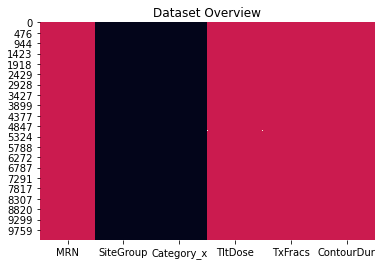

 Categerocial   Numeric   NaN 


In [67]:
dic_cols = {col:utils_recognize_type(dtf, col, max_cat=20) for col in dtf.columns}
heatmap = dtf.isnull()
for k,v in dic_cols.items():
 if v == "num":
   heatmap[k] = heatmap[k].apply(lambda x: 0.5 if x is False else 1)
 else:
   heatmap[k] = heatmap[k].apply(lambda x: 0 if x is False else 1)
sns.heatmap(heatmap, cbar=False).set_title('Dataset Overview')
plt.show()
print("\033[1;37;40m Categerocial ", "\033[1;30;41m Numeric ", "\033[1;30;47m NaN ")

In [68]:
# dtf = dtf.set_index("Id")
dtf = dtf.rename(columns={target_y:"Y"})

#### Visualisation
#### univariate distributions

KeyError: 'Y'

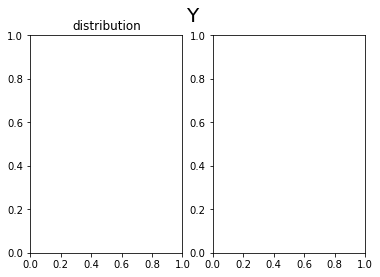

In [69]:
#A histogram is perfect to give a rough sense of the density of the underlying distribution of a single numerical data. 
#box plot to graphically depict data groups through their quartiles.

x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(dtf[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

KeyError: 'Y'

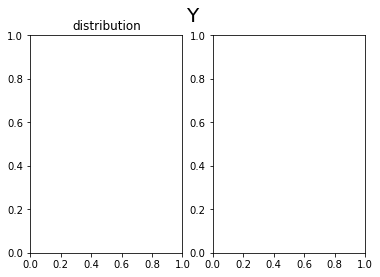

In [70]:
x = "Y"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = dtf[x].fillna(dtf[x].median()) # median
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = dtf[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))

### boxplot 
ax[1].title.set_text('outliers (normal scale)')
#tmp_dtf = pd.DataFrame(dtf[x])
#tmp_dtf[x] = np.log(tmp_dtf[x])
#tmp_dtf.boxplot(column=x, ax=ax[1])
dtf.boxplot(column=x, ax=ax[1])
plt.show()

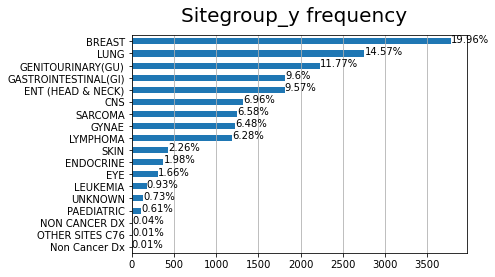

In [47]:
# Moreover, A bar plot is appropriate to understand labels frequency for a single categorical variable. 
x = "Sitegroup_y"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x+' frequency', fontsize=20)
plt.show()

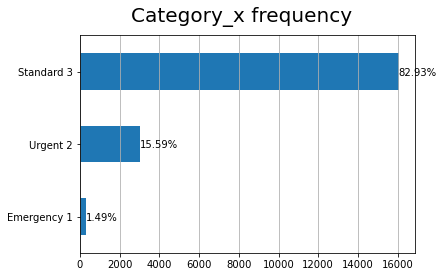

In [48]:
x = "Category_x"
ax = dtf[x].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle(x+' frequency', fontsize=20)
plt.show()

#### bivariate distribution to understand if SiteGroup has predictive power to predict Y. This would be the case of categorical (Sitegroup_y) vs numerical (Y)

In [61]:
#dtf.dropna(subset=['Sitegroup_y'], inplace=True)
dtf['SiteGroup'].unique()

KeyError: 'SiteGroup'

In [60]:
dtf = dtf.loc[dtf['Sitegroup_y'].isin(['LUNG', 'GENITOURINARY(GU)', 'GASTROINTESTINAL(GI)', 'BREAST',
                                   'GYNAE', 'LYMPHOMA', 'ENT (HEAD & NECK)', 'CNS', 'SARCOMA', 'SKIN',
                                   'ENDOCRINE', 'LEUKEMIA', 'EYE', 'UNKNOWN'])]


In [124]:
dtf.head()


Sitegroup_y  Category_x  TltDose  TxFracs    Y
1                   LUNG    Urgent 2   2000.0      5.0  0.0
4   GASTROINTESTINAL(GI)  Standard 3   3600.0     20.0  2.0
5      GENITOURINARY(GU)    Urgent 2   1600.0      2.0  0.0
10                BREAST  Standard 3   4240.0     16.0  1.0
11                BREAST  Standard 3   4240.0     16.0  1.0

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


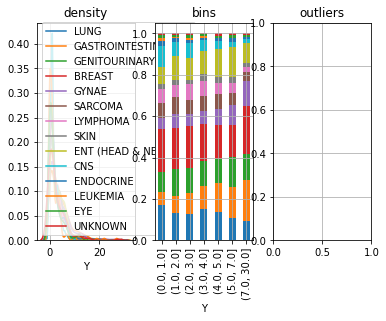

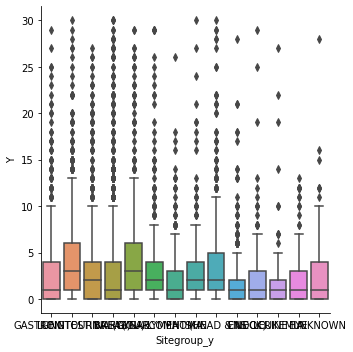

In [125]:
cat, num = "Sitegroup_y", "Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)


### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)

plt.show()

In [126]:
dtf = dtf[dtf['Category_x'].notnull()]
dtf.size

93960

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try boxplot
  warnings.warn(msg, UserWarning)


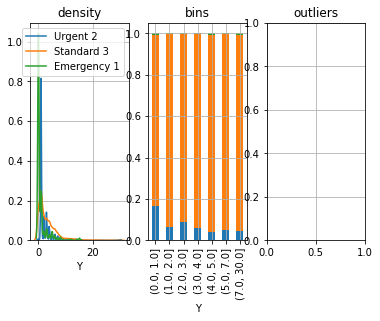

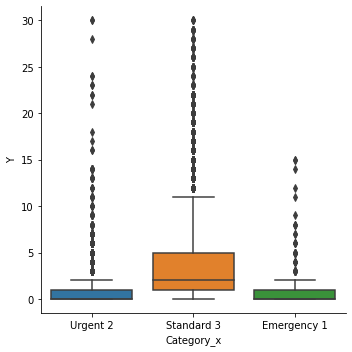

In [127]:
cat, num = "Category_x", "Y"
fig, ax = plt.subplots(nrows=1, ncols=3,  sharex=False, sharey=False)
#fig.suptitle(x+"   vs   "+y, fontsize=20)
            
### distribution
ax[0].title.set_text('density')
for i in dtf[cat].unique():
    sns.distplot(dtf[dtf[cat]==i][num], hist=False, label=i, ax=ax[0])
ax[0].grid(True)


### stacked
ax[1].title.set_text('bins')
breaks = np.quantile(dtf[num], q=np.linspace(0,1,11))
tmp = dtf.groupby([cat, pd.cut(dtf[num], breaks, duplicates='drop')]).size().unstack().T
tmp = tmp[dtf[cat].unique()]
tmp["tot"] = tmp.sum(axis=1)
for col in tmp.drop("tot", axis=1).columns:
     tmp[col] = tmp[col] / tmp["tot"]
tmp.drop("tot", axis=1).plot(kind='bar', stacked=True, ax=ax[1], legend=False, grid=True)

### boxplot   
ax[2].title.set_text('outliers')
sns.catplot(x=cat, y=num, data=dtf, kind="box", ax=ax[2])
ax[2].grid(True)

plt.show()

#### ANOVA tests for features

In [128]:
cat, num = "Sitegroup_y", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


In [129]:
cat, num = "Category_x", "Y"
model = smf.ols(num+' ~ '+cat, data=dtf).fit()
table = sm.stats.anova_lm(model)
p = table["PR(>F)"][0]
coeff, p = None, round(p, 3)
conclusion = "Correlated" if p < 0.05 else "Non-Correlated"
print("Anova F: the variables are", conclusion, "(p-value: "+str(p)+")")

Anova F: the variables are Correlated (p-value: 0.0)


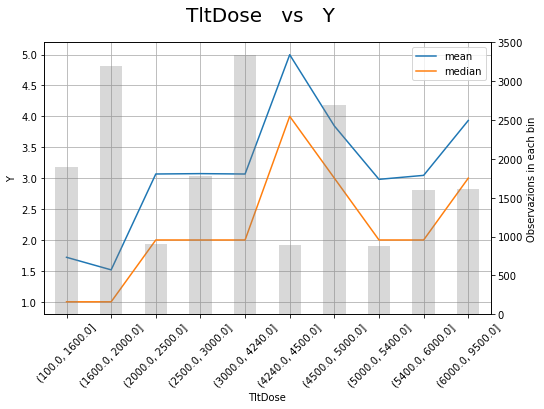

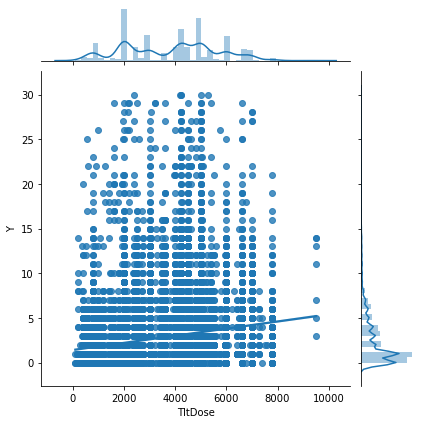

In [130]:
# behavior of the target variable with respect to TltDose 
# This is a case of numerical (TltDose) vs numerical (Y)
x, y = "TltDose", "Y"
figsize=[8,5]
### bin plot
### group GrLivArea values into bins and compare the mean value (and median) of Y in each bin, 
### if the curve isn’t flat then the variable is predictive because the bins have different patterns
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

### scatter plot
### distributions of the two variables on the sides
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()

In [131]:
### test the correlation between these 2 variables. 
### Since they are both numerical, I’d test the Pearson’s Correlation Coefficient:
x, y = "TltDose", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")


Pearson Correlation: 0.19 Significant (p-value: 0.0)


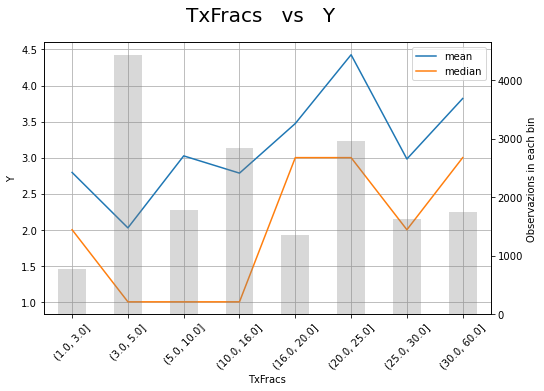

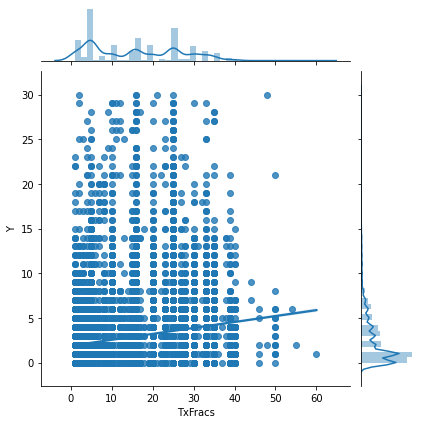

In [132]:
x, y = "TxFracs", "Y"
figsize=[8,5]
### bin plot
### group GrLivArea values into bins and compare the mean value (and median) of Y in each bin, 
### if the curve isn’t flat then the variable is predictive because the bins have different patterns
dtf_noNan = dtf[dtf[x].notnull()]
breaks = np.quantile(dtf_noNan[x], q=np.linspace(0, 1, 11))
groups = dtf_noNan.groupby([pd.cut(dtf_noNan[x], bins=breaks, 
           duplicates='drop')])[y].agg(['mean','median','size'])
fig, ax = plt.subplots(figsize=figsize)
fig.suptitle(x+"   vs   "+y, fontsize=20)
groups[["mean", "median"]].plot(kind="line", ax=ax)
groups["size"].plot(kind="bar", ax=ax, rot=45, secondary_y=True,
                    color="grey", alpha=0.3, grid=True)
ax.set(ylabel=y)
ax.right_ax.set_ylabel("Observazions in each bin")
plt.show()

### scatter plot
### distributions of the two variables on the sides
sns.jointplot(x=x, y=y, data=dtf, dropna=True, kind='reg', 
              height=int((figsize[0]+figsize[1])/2) )
plt.show()


In [133]:
x, y = "TxFracs", "Y"
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.193 Significant (p-value: 0.0)


In [389]:
dtf['product']=dtf['TltDose']*dtf['TxFracs']
dtf['ratio']=dtf['TltDose']/dtf['TxFracs']

<ipython-input-389-05bf1f698727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['product']=dtf['TltDose']*dtf['TxFracs']
<ipython-input-389-05bf1f698727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf['ratio']=dtf['TltDose']/dtf['TxFracs']


In [393]:
x, y = "ratio", target_y
dtf_noNan = dtf[dtf[x].notnull()]
coeff, p = scipy.stats.pearsonr(dtf_noNan[x], dtf_noNan[y])
coeff, p = round(coeff, 3), round(p, 3)
conclusion = "Significant" if p < 0.05 else "Non-Significant"
print("Pearson Correlation:", coeff, conclusion, "(p-value: "+str(p)+")")

Pearson Correlation: 0.022 Non-Significant (p-value: 0.172)


#### Feature Engineering

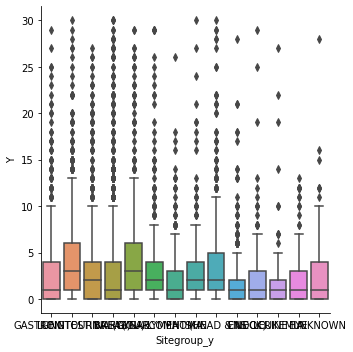

In [134]:
sns.catplot(x="Sitegroup_y", y="Y", data=dtf, kind="box")

In [135]:
dtf.size

93960

### Model

In [71]:
dtf.head()


MRN          SiteGroup  Category_x  TltDose  TxFracs  ContourDur
0   7287  GENITOURINARY(GU)    Urgent 2   1600.0      2.0         0.0
1   7287  GENITOURINARY(GU)  Standard 3   2400.0      3.0         0.0
4  10287             BREAST  Standard 3   4240.0     16.0         0.0
6  12169              GYNAE  Standard 3   2500.0     10.0         3.0
7  15820             BREAST  Standard 3   4240.0     16.0         0.0

In [73]:
# train test split
## split data
dtf['Y'] = dtf['ContourDur']
dtf_train, dtf_test = model_selection.train_test_split(dtf, 
                      test_size=0.3)
## print info
print("X_train shape:", dtf_train.drop("Y",axis=1).shape, "| X_test shape:", dtf_test.drop("Y",axis=1).shape)
print("y_train mean:", round(np.mean(dtf_train["Y"]),2), "| y_test mean:", round(np.mean(dtf_test["Y"]),2))
print(dtf_train.shape[1], "features:", dtf_train.drop("Y",axis=1).columns.to_list())


X_train shape: (4710, 6) | X_test shape: (2019, 6)
y_train mean: 1.47 | y_test mean: 1.55
7 features: ['MRN', 'SiteGroup', 'Category_x', 'TltDose', 'TxFracs', 'ContourDur']


#### Pre-processing

In [74]:
# fill na 
dtf_train["SiteGroup"] = dtf_train["SiteGroup"].fillna(dtf_train["SiteGroup"].mode())
dtf_train["TltDose"] = dtf_train["TltDose"].fillna(dtf_train["TltDose"].median())
dtf_train["TxFracs"] = dtf_train["TxFracs"].fillna(dtf_train["TxFracs"].median())

dtf_test["SiteGroup"] = dtf_test["SiteGroup"].fillna(dtf_test["SiteGroup"].mode())
dtf_test["TltDose"] = dtf_test["TltDose"].fillna(dtf_test["TltDose"].median())
dtf_test["TxFracs"] = dtf_test["TxFracs"].fillna(dtf_test["TxFracs"].median())


<ipython-input-74-860d26ca2bde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["SiteGroup"] = dtf_train["SiteGroup"].fillna(dtf_train["SiteGroup"].mode())
<ipython-input-74-860d26ca2bde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtf_train["TltDose"] = dtf_train["TltDose"].fillna(dtf_train["TltDose"].median())
<ipython-input-74-860d26ca2bde>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [75]:
#from sklearn.preprocessing import OneHotEncoder
## create dummy
dummy = pd.get_dummies(dtf_train[["SiteGroup","Category_x"]], 
                       prefix=['Site','Categ']) #, drop_first=True)
dtf_train= pd.concat([dtf_train, dummy], axis=1)
print( dtf_train.filter(like="SiteGroup",axis=1).head() )
## drop the original categorical column
dtf_train = dtf_train.drop(['SiteGroup','Category_x'], axis=1)


              SiteGroup
4918             BREAST
5387              GYNAE
1116           GI LOWER
3676  ENT (HEAD & NECK)
2575             BREAST


In [76]:
## create dummy
dummy = pd.get_dummies(dtf_test[["SiteGroup","Category_x"]], 
                       prefix=['Site','Categ']) #, drop_first=True)
dtf_test= pd.concat([dtf_test, dummy], axis=1)
print( dtf_test.filter(like="SiteGroup",axis=1).head() )
## drop the original categorical column
dtf_test = dtf_test.drop(['SiteGroup','Category_x'], axis=1)


              SiteGroup
9118               LUNG
4808               SKIN
6301  GENITOURINARY(GU)
1270                EYE
7691                CNS


In [77]:
from sklearn.preprocessing import RobustScaler
## scale X
scalerX = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerX.fit_transform(dtf_train.drop("Y", axis=1))
dtf_scaled= pd.DataFrame(X, columns=dtf_train.drop("Y", axis=1).columns, index=dtf_train.index)

## scale Y
scalerY = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled[y] = scalerY.fit_transform(dtf_train[y].values.reshape(-1,1))


KeyError: 2020

In [69]:
'''
## scale X - test
scalerXtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
X = scalerXtest.fit_transform(dtf_test.drop("Y", axis=1))
dtf_scaled_test= pd.DataFrame(X, columns=dtf_test.drop("Y", axis=1).columns, index=dtf_test.index)

## scale Y - test
scalerYtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))
dtf_scaled_test[y] = scalerYtest.fit_transform(dtf_test[y].values.reshape(-1,1))
'''

'\n## scale X - test\nscalerXtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))\nX = scalerXtest.fit_transform(dtf_test.drop("Y", axis=1))\ndtf_scaled_test= pd.DataFrame(X, columns=dtf_test.drop("Y", axis=1).columns, index=dtf_test.index)\n\n## scale Y - test\nscalerYtest = preprocessing.RobustScaler(quantile_range=(25.0, 75.0))\ndtf_scaled_test[y] = scalerYtest.fit_transform(dtf_test[y].values.reshape(-1,1))\n'

Text(0.5, 1.0, 'pearson correlation')

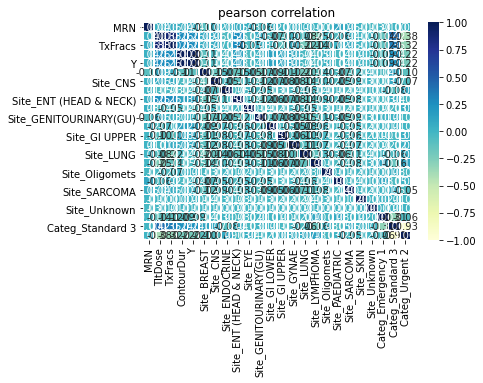

In [78]:
corr_matrix = dtf_train.corr(method="pearson")
sns.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5)
plt.title("pearson correlation")

#### Feature importance

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=1.05615e-16): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


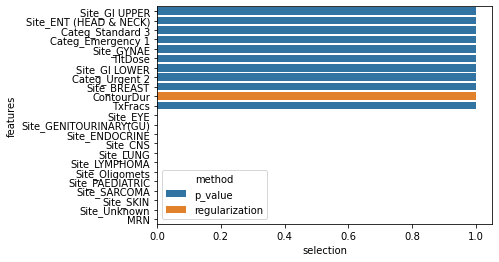

In [79]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns
## p-value
selector = feature_selection.SelectKBest(score_func=  
               feature_selection.f_regression, k=10).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]

## regularization
selector = feature_selection.SelectFromModel(estimator= 
              linear_model.Ridge(alpha=1.0, fit_intercept=True), 
                                 max_features=10).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 
## plot
dtf_features = pd.DataFrame({"features":feature_names})
dtf_features["p_value"] = dtf_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
dtf_features["num1"] = dtf_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
dtf_features["regularization"] = dtf_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
dtf_features["num2"] = dtf_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
dtf_features["method"] = dtf_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
dtf_features["selection"] = dtf_features["num1"] + dtf_features["num2"]
dtf_features["method"] = dtf_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
sns.barplot(y="features", x="selection", hue="method", data=dtf_features.sort_values("selection", ascending=False), dodge=False)

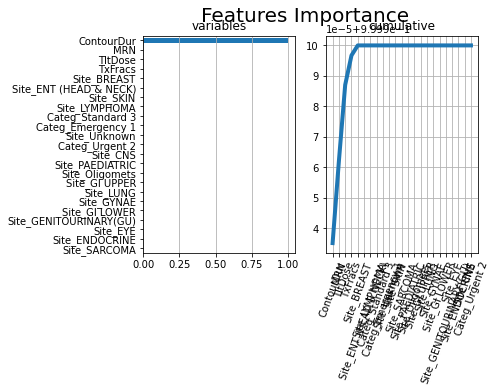

In [80]:
X = dtf_train.drop("Y", axis=1).values
y = dtf_train["Y"].values
feature_names = dtf_train.drop("Y", axis=1).columns.tolist()
## call model
model = ensemble.GradientBoostingRegressor()
## Importance
model.fit(X,y)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] =  dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False)
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()


In [145]:
dtf_train.columns


Index(['TltDose', 'TxFracs', 'Y', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE',
       'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GASTROINTESTINAL(GI)',
       'Site_GENITOURINARY(GU)', 'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG',
       'Site_LYMPHOMA', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN',
       'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2'],
      dtype='object')

#### Using some features

In [74]:
X_names = ['TxFracs', 'Site_GASTROINTESTINAL(GI)', 'TltDose', 'Site_BREAST','Categ_Standard 3','Site_CNS','Site_GYNAE',
          'Site_ENT (HEAD & NECK)','Site_SKIN']
X_train = dtf_train[X_names].values
y_train = dtf_train["Y"].values
X_test = dtf_test[X_names].values
y_test = dtf_test["Y"].values


#### regression models

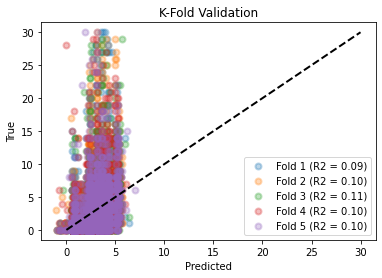

In [75]:
#simple linear regression and use it as a baseline
## call model
model = linear_model.LinearRegression()
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()
### The first metric I normally use is the R squared, which indicates
### the proportion of the variance in the dependent variable that is predictable from the independent variable

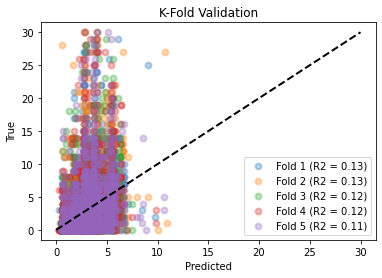

In [76]:
## call model
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state=0
                                 )
## K fold validation
scores = []
cv = model_selection.KFold(n_splits=5, shuffle=True)
fig = plt.figure()
i = 1
for train, test in cv.split(X_train, y_train):
    prediction = model.fit(X_train[train],
                 y_train[train]).predict(X_train[test])
    true = y_train[test]
    score = metrics.r2_score(true, prediction)
    scores.append(score)
    plt.scatter(prediction, true, lw=2, alpha=0.3, 
                label='Fold %d (R2 = %0.2f)' % (i,score))
    i = i+1
    
### plotting predicted values against the actual Y
### Ideally, points should be all close to a diagonal line where predicted = actual
plt.plot([min(y_train),max(y_train)], [min(y_train),max(y_train)], 
         linestyle='--', lw=2, color='black')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('K-Fold Validation')
plt.legend()
plt.show()

### Classification

In [81]:
target_y = "ContourDur"

(1010, 28)


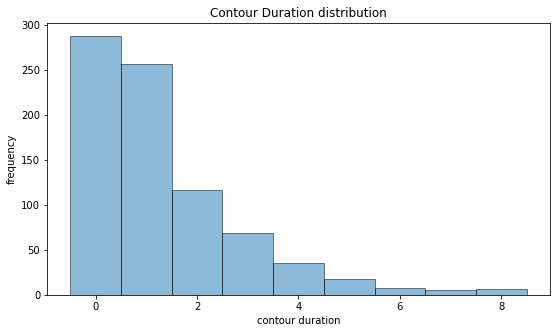

In [82]:
# use more recent data
df19=preTxDur[(pd.to_datetime(preTxDur['CreatedDate']).dt.date>=pd.to_datetime("2019-10-01")) 
                &(pd.to_datetime(preTxDur['CreatedDate']).dt.year<2020)]
print(df19.shape)

plt.figure(figsize=[9,5])
bins = range(0,10)

y = df19[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('contour duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [83]:
df19.shape


(1010, 28)

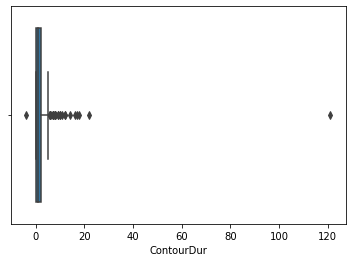

In [85]:
import seaborn as sns
sns.boxplot(x= df19[target_y])

In [86]:
features

['SiteGroup', 'Category_x', 'TltDose', 'TxFracs']

In [110]:
df_clf = df19[features + [target_y]]
               #      'ContourDur','TimeBtw_Sim_ContourCompl']] # y - target
#df_clf=dtf[(dtf[target_y]<=30)&(dtf[target_y]>=0)]
df_clf.shape


(1010, 5)

In [111]:
df_clf = df_clf[df_clf['SiteGroup'].notnull()]
df_clf['SiteGroup'].unique()


array(['LUNG', 'CNS', 'GENITOURINARY(GU)', 'ENT (HEAD & NECK)',
       'GI UPPER', 'GYNAE', 'LYMPHOMA', 'SARCOMA', 'BREAST', 'GI LOWER',
       'ENDOCRINE', 'SKIN', 'EYE', 'PAEDIATRIC'], dtype=object)

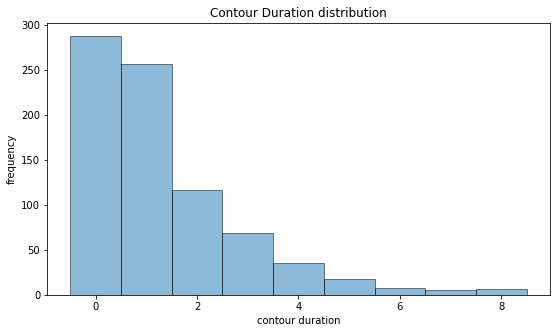

In [112]:
plt.figure(figsize=[9,5])
bins = range(0,10)

y = df_clf[target_y]
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('contour duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [113]:
y = df_clf[target_y]
#removed_outliers = y.between(y.quantile(.05), y.quantile(.95))
#index_names = df_clf[~removed_outliers].index 
#df_clf.drop(index_names, inplace=True)

print(str(len(df_clf.index)) + "/" + str(y.size) + " data points remain.") 


1010/1010 data points remain.


In [114]:
# fill na
df_clf["SiteGroup"] = df_clf["SiteGroup"].fillna(df_clf["SiteGroup"].mode())
df_clf["TltDose"] = df_clf["TltDose"].fillna(df_clf["TltDose"].median())
df_clf["TxFracs"] = df_clf["TxFracs"].fillna(df_clf["TxFracs"].median())
df_clf['ContourDur'] = df_clf['ContourDur'].fillna(df_clf['ContourDur'].median())

In [115]:
# dummy
## create dummy
dummy = pd.get_dummies(df_clf[["SiteGroup","Category_x"]], prefix=['Site','Categ']) #, drop_first=True)
dummy.columns

Index(['Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)',
       'Site_EYE', 'Site_GENITOURINARY(GU)', 'Site_GI LOWER', 'Site_GI UPPER',
       'Site_GYNAE', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_PAEDIATRIC',
       'Site_SARCOMA', 'Site_SKIN', 'Categ_Emergency 1', 'Categ_Standard 3',
       'Categ_Urgent 2'],
      dtype='object')

In [116]:
df_clf = pd.concat([df_clf, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
df_clf = df_clf.drop(['SiteGroup','Category_x'], axis=1)
df_clf.head()

TltDose  TxFracs  ContourDur  Site_BREAST  Site_CNS  Site_ENDOCRINE  \
21   6000.0     20.0         4.0            0         0               0   
44   5400.0     30.0         2.0            0         1               0   
48   2000.0      5.0         1.0            0         0               0   
52    400.0      2.0         2.0            0         0               0   
54   5250.0     30.0         3.0            0         0               0   

    Site_ENT (HEAD & NECK)  Site_EYE  Site_GENITOURINARY(GU)  Site_GI LOWER  \
21                       0         0                       0              0   
44                       0         0                       0              0   
48                       0         0                       1              0   
52                       1         0                       0              0   
54                       0         0                       0              0   

    Site_GI UPPER  Site_GYNAE  Site_LUNG  Site_LYMPHOMA  Site_PAEDIATRIC  \
21              0           0          1              0                0   
44              0           0          0              0                0   
48              0           0          0              0                0   
52              0           0          0              0                0   
54              1           0          0              0                0   

    Site_SARCOMA  Site_SKIN  Categ_Emergency 1  Categ_Standard 3  \
21             0          0                  0                 1   
44             0          0                  0                 1   
48             0          0                  0                 0   
52             0          0                  0                 1   
54             0          0                  0                 1   

    Categ_Urgent 2  
21               0  
44               0  
48               1  
52               0  
54               0

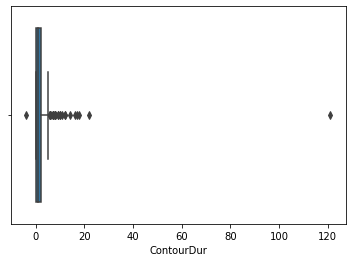

In [117]:
import seaborn as sns
sns.boxplot(x = df_clf[target_y])

In [123]:
# train-test split
df_train, df_test = model_selection.train_test_split(df_clf, test_size=0.3)
## print info
print("X_train shape:", df_train.drop(target_y,axis=1).shape, "| X_test shape:", df_test.drop(target_y,axis=1).shape)
print("y_train mean:", round(np.mean(df_train[target_y]),2), "| y_test mean:", round(np.mean(df_test[target_y]),2))
print(df_train.shape[1], "features:", df_train.drop(target_y,axis=1).columns.to_list())

X_train shape: (707, 19) | X_test shape: (303, 19)
y_train mean: 1.56 | y_test mean: 1.38
20 features: ['TltDose', 'TxFracs', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GENITOURINARY(GU)', 'Site_GI LOWER', 'Site_GI UPPER', 'Site_GYNAE', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2']


In [124]:
# copy df_test
df_test_copy=df_test

In [125]:
# reorganise the classes
# 0-1, class 0; 2-5, class 1, >5, class 2
df_train.loc[df_train[target_y] <=0, 'ContourGroup'] = 0
df_train.loc[(df_train[target_y] <=3)&(df_train[target_y]>=1), 'ContourGroup'] = 1
df_train.loc[df_train[target_y] >=3, 'ContourGroup'] = 2
df_train = df_train.drop(columns=[target_y])

df_test.loc[df_test[target_y] <=0, 'ContourGroup'] = 0
df_test.loc[(df_test[target_y] <=2)&(df_test[target_y]>=1), 'ContourGroup'] = 1
df_test.loc[df_test[target_y] >=3, 'ContourGroup'] = 2
df_test = df_test.drop(columns=[target_y])


### Trying simple mean method ... Not good

In [347]:
df_mean = df_clf
df_mean.head()

Sitegroup_y  Category_x  TltDose  TxFracs  TimeBtw_Sim_BkTx
13              GYNAE  Standard 3   2500.0     10.0                 9
25             BREAST  Standard 3   2750.0      5.0                 3
26             BREAST      Urgent   2000.0      5.0                 0
56  ENT (HEAD & NECK)      Urgent    800.0      1.0                 0
57  ENT (HEAD & NECK)      Urgent    800.0      1.0                 0

In [349]:
df_mean['Sitegroup_y'].unique()

array(['GYNAE', 'BREAST', 'ENT (HEAD & NECK)', 'CNS', 'LUNG',
       'GASTROINTESTINAL(GI)', 'GENITOURINARY(GU)', 'SARCOMA', 'LYMPHOMA',
       'LEUKEMIA', 'EYE', 'ENDOCRINE', 'SKIN', 'UNKNOWN', 'PAEDIATRIC',
       'NON CANCER DX', 'Non Cancer Dx'], dtype=object)

In [365]:
df_mean['Category_x'].replace("Emergency 1","Urgent", inplace=True)
df_mean['Category_x'].replace("Urgent 2","Urgent", inplace=True)
df_mean['Sitegroup_y'].replace("Non Cancer Dx","NON CANCER DX", inplace=True)
df_mean.dropna(subset=['Sitegroup_y', 'Category_x'])

Sitegroup_y  Category_x  TltDose  TxFracs  TimeBtw_Sim_BkTx
13                    GYNAE  Standard 3   2500.0     10.0                 9
25                   BREAST  Standard 3   2750.0      5.0                 3
26                   BREAST      Urgent   2000.0      5.0                 0
56        ENT (HEAD & NECK)      Urgent    800.0      1.0                 0
57        ENT (HEAD & NECK)      Urgent    800.0      1.0                 0
...                     ...         ...      ...      ...               ...
57695                  LUNG  Standard 3   2000.0      5.0                 0
57697  GASTROINTESTINAL(GI)  Standard 3    800.0      1.0                 0
57749                  SKIN  Standard 3   2000.0      5.0                 0
57757                  LUNG  Standard 3   3000.0      5.0                 4
57758     GENITOURINARY(GU)      Urgent   3500.0      5.0                 1

[2880 rows x 5 columns]

In [366]:
# train-test split
df_train, df_test = model_selection.train_test_split(df_mean, test_size=0.3)
## print info
print("X_train shape:", df_train.shape, "| X_test shape:", df_test.shape)
print("y_train mean:", round(np.mean(df_train[target_y]),2), "| y_test mean:", round(np.mean(df_test[target_y]),2))
print(df_train.shape[1], "features:", df_train.drop(target_y,axis=1).columns.to_list())

X_train shape: (2016, 5) | X_test shape: (864, 5)
y_train mean: 3.21 | y_test mean: 3.36
5 features: ['Sitegroup_y', 'Category_x', 'TltDose', 'TxFracs']


In [367]:
df_train.head()

Sitegroup_y  Category_x  TltDose  TxFracs  TimeBtw_Sim_BkTx
52927             BREAST  Standard 3   4256.0     16.0                 2
9477              BREAST  Standard 3   2850.0      5.0                 4
6438               GYNAE  Standard 3   4500.0     25.0                 8
46176  GENITOURINARY(GU)  Standard 3   2400.0      3.0                 6
52330            SARCOMA  Standard 3   2400.0      2.0                 8

In [368]:
df_test.head()

Sitegroup_y  Category_x  TltDose  TxFracs  TimeBtw_Sim_BkTx
54751     GENITOURINARY(GU)  Standard 3   4270.0      7.0                 5
56476  GASTROINTESTINAL(GI)      Urgent   2000.0      5.0                 3
5947                   SKIN  Standard 3   6000.0     25.0                 0
5401                 BREAST  Standard 3   4005.0     15.0                 6
55516     GENITOURINARY(GU)  Standard 3   6000.0     20.0                 6

In [369]:
mean_train = df_train.groupby(by=['Sitegroup_y','Category_x'])[target_y].median().reset_index()
#mean_train = mean_train[['Sitegroup_y','Category_x',]]
mean_train.head()

Sitegroup_y  Category_x  TimeBtw_Sim_BkTx
0      BREAST  Standard 3               4.0
1      BREAST      Urgent               0.0
2         CNS  Standard 3               2.0
3         CNS      Urgent               0.0
4   ENDOCRINE  Standard 3               2.0

In [370]:
#from collections import defaultdict
#dict_train = defaultdict(dict)
dict_train = mean_train.set_index(['Sitegroup_y','Category_x']).to_dict()
#dict_train

In [371]:
dict_train[target_y]

{('BREAST', 'Standard 3'): 4.0,
 ('BREAST', 'Urgent'): 0.0,
 ('CNS', 'Standard 3'): 2.0,
 ('CNS', 'Urgent'): 0.0,
 ('ENDOCRINE', 'Standard 3'): 2.0,
 ('ENDOCRINE', 'Urgent'): 0.0,
 ('ENT (HEAD & NECK)', 'Standard 3'): 3.5,
 ('ENT (HEAD & NECK)', 'Urgent'): 0.0,
 ('EYE', 'Standard 3'): 1.5,
 ('EYE', 'Urgent'): 0.0,
 ('GASTROINTESTINAL(GI)', 'Standard 3'): 5.0,
 ('GASTROINTESTINAL(GI)', 'Urgent'): 0.0,
 ('GENITOURINARY(GU)', 'Standard 3'): 5.5,
 ('GENITOURINARY(GU)', 'Urgent'): 0.0,
 ('GYNAE', 'Standard 3'): 5.0,
 ('GYNAE', 'Urgent'): 0.0,
 ('LEUKEMIA', 'Standard 3'): 1.0,
 ('LEUKEMIA', 'Urgent'): 0.0,
 ('LUNG', 'Standard 3'): 3.0,
 ('LUNG', 'Urgent'): 0.0,
 ('LYMPHOMA', 'Standard 3'): 2.5,
 ('LYMPHOMA', 'Urgent'): 0.0,
 ('NON CANCER DX', 'Standard 3'): 6.0,
 ('PAEDIATRIC', 'Standard 3'): 0.5,
 ('PAEDIATRIC', 'Urgent'): 0.0,
 ('SARCOMA', 'Standard 3'): 4.0,
 ('SARCOMA', 'Urgent'): 0.0,
 ('SKIN', 'Standard 3'): 3.0,
 ('SKIN', 'Urgent'): 0.0,
 ('UNKNOWN', 'Standard 3'): 4.0,
 ('UNKNOWN', '

In [358]:
dict_train[target_y].update({("PAEDIATRIC","Urgent"):0})

In [384]:
new_list=[]
for index, row in df_test.iterrows():
    #print(row['Sitegroup_y'],row['Category_x'])
    value = dict_train[target_y][(row['Sitegroup_y'],row['Category_x'])]
    new_list.append(int(value))
#new_list   

In [385]:
df_test['pred']=new_list
df_test.head()

<ipython-input-385-a0c24853277a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pred']=new_list


Sitegroup_y  Category_x  TltDose  TxFracs  TimeBtw_Sim_BkTx  \
54751     GENITOURINARY(GU)  Standard 3   4270.0      7.0                 5   
56476  GASTROINTESTINAL(GI)      Urgent   2000.0      5.0                 3   
5947                   SKIN  Standard 3   6000.0     25.0                 0   
5401                 BREAST  Standard 3   4005.0     15.0                 6   
55516     GENITOURINARY(GU)  Standard 3   6000.0     20.0                 6   

       pred  
54751     5  
56476     0  
5947      3  
5401      4  
55516     5

In [386]:
# accuracy?
from sklearn.metrics import accuracy_score
#dtree_model.score(df_test[target_y], df_test['pred'])
accuracy_score(df_test[target_y], df_test['pred'])

0.3263888888888889

### dummy

In [515]:
## create dummy
#dummy = pd.get_dummies(df_clf[["Sitegroup_y","Category_x"]], prefix=['Site','Categ']) #, drop_first=True)
#dummy.columns


Index(['Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)',
       'Site_EYE', 'Site_GASTROINTESTINAL(GI)', 'Site_GENITOURINARY(GU)',
       'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG', 'Site_LYMPHOMA',
       'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN',
       'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2'],
      dtype='object')

In [516]:
'''df_clf = pd.concat([df_clf, dummy], axis=1)
#print( df_clf.filter(like="Sitegroup_y",axis=1).head() )

## drop the original categorical column
df_clf = df_clf.drop(['Sitegroup_y','Category_x'], axis=1)
df_clf.head()'''


TltDose  TxFracs  ContourGroup  Site_BREAST  Site_CNS  Site_ENDOCRINE  \
93    6000.0     20.0           2.0            0         0               0   
306   5400.0     30.0           2.0            0         1               0   
324   2000.0      5.0           0.0            0         0               0   
337    400.0      2.0           0.0            0         0               0   
376   5250.0     30.0           2.0            0         0               0   

     Site_ENT (HEAD & NECK)  Site_EYE  Site_GASTROINTESTINAL(GI)  \
93                        0         0                          0   
306                       0         0                          0   
324                       0         0                          0   
337                       1         0                          0   
376                       0         0                          1   

     Site_GENITOURINARY(GU)  ...  Site_LEUKEMIA  Site_LUNG  Site_LYMPHOMA  \
93                        0  ...              0          1              0   
306                       0  ...              0          0              0   
324                       1  ...              0          0              0   
337                       0  ...              0          0              0   
376                       0  ...              0          0              0   

     Site_PAEDIATRIC  Site_SARCOMA  Site_SKIN  Site_UNKNOWN  \
93                 0             0          0             0   
306                0             0          0             0   
324                0             0          0             0   
337                0             0          0             0   
376                0             0          0             0   

     Categ_Emergency 1  Categ_Standard 3  Categ_Urgent 2  
93                   0                 1               0  
306                  0                 1               0  
324                  0                 0               1  
337                  0                 1               0  
376                  0                 1               0  

[5 rows x 21 columns]

In [517]:
# train-test split
'''df_train, df_test = model_selection.train_test_split(df_clf, test_size=0.3)
## print info
print("X_train shape:", df_train.drop("ContourGroup",axis=1).shape, "| X_test shape:", df_test.drop("ContourGroup",axis=1).shape)
print("y_train mean:", round(np.mean(df_train["ContourGroup"]),2), "| y_test mean:", round(np.mean(df_test["ContourGroup"]),2))
print(df_train.shape[1], "features:", df_train.drop("ContourGroup",axis=1).columns.to_list())'''

X_train shape: (697, 20) | X_test shape: (300, 20)
y_train mean: 0.83 | y_test mean: 0.83
21 features: ['TltDose', 'TxFracs', 'Site_BREAST', 'Site_CNS', 'Site_ENDOCRINE', 'Site_ENT (HEAD & NECK)', 'Site_EYE', 'Site_GASTROINTESTINAL(GI)', 'Site_GENITOURINARY(GU)', 'Site_GYNAE', 'Site_LEUKEMIA', 'Site_LUNG', 'Site_LYMPHOMA', 'Site_PAEDIATRIC', 'Site_SARCOMA', 'Site_SKIN', 'Site_UNKNOWN', 'Categ_Emergency 1', 'Categ_Standard 3', 'Categ_Urgent 2']


#### Feature selection

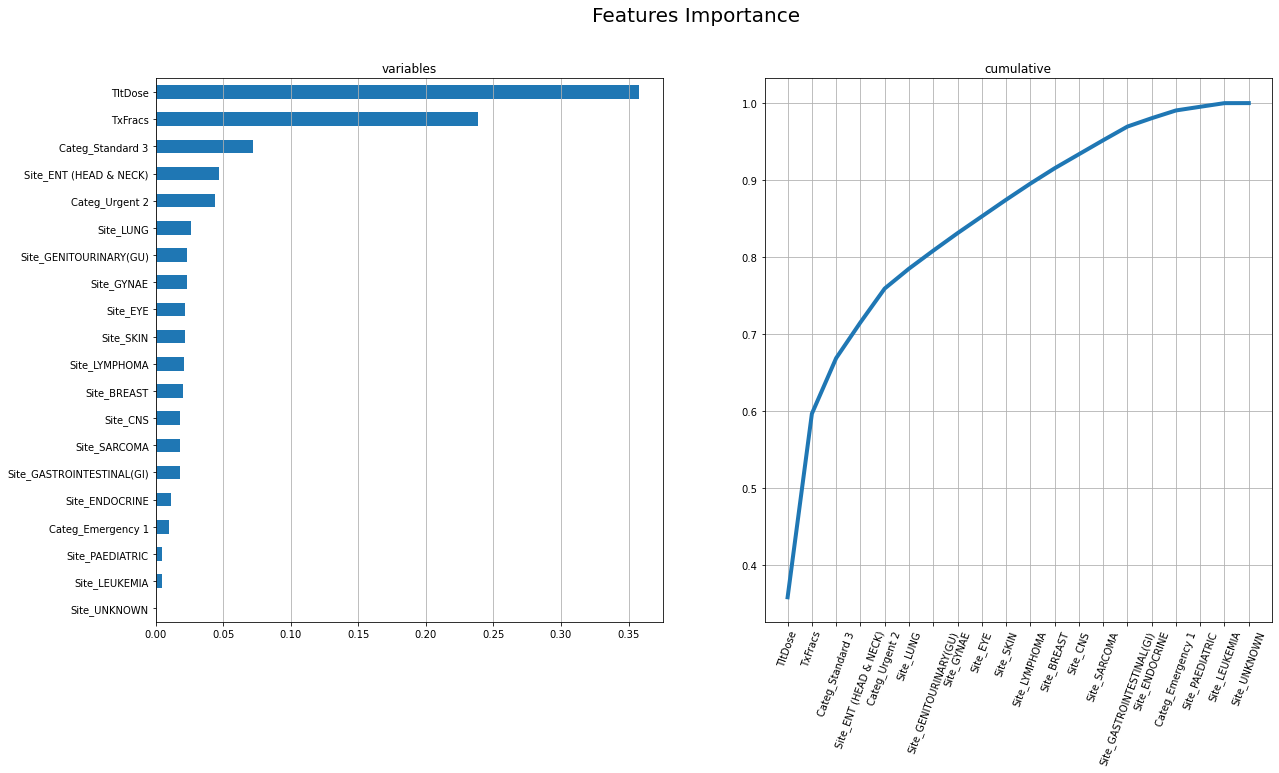

In [619]:
# random forest to select features
X_train = df_train.drop("ContourGroup", axis=1).values
y_train = df_train["ContourGroup"].values

X_test = df_test.drop("ContourGroup", axis=1).values
y_test = df_test["ContourGroup"].values
feature_names = df_train.drop("ContourGroup", axis=1).columns.tolist()
## Importance
model = ensemble.RandomForestClassifier(n_estimators=100,
                      criterion="entropy", random_state=0)
model.fit(X_train,y_train)
importances = model.feature_importances_
## Put in a pandas dtf
dtf_importances = pd.DataFrame({"IMPORTANCE":importances, 
            "VARIABLE":feature_names}).sort_values("IMPORTANCE", 
            ascending=False)
dtf_importances['cumsum'] = dtf_importances['IMPORTANCE'].cumsum(axis=0)
dtf_importances = dtf_importances.set_index("VARIABLE")
    
## Plot
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20, 10))
fig.suptitle("Features Importance", fontsize=20)
ax[0].title.set_text('variables')
dtf_importances[["IMPORTANCE"]].sort_values(by="IMPORTANCE").plot(
                kind="barh", legend=False, ax=ax[0]).grid(axis="x")
ax[0].set(ylabel="")
ax[1].title.set_text('cumulative')
dtf_importances[["cumsum"]].plot(kind="line", linewidth=4, 
                                 legend=False, ax=ax[1])
ax[1].set(xlabel="", xticks=np.arange(len(dtf_importances)), 
          xticklabels=dtf_importances.index)
plt.xticks(rotation=70)
plt.grid(axis='both')
plt.show()

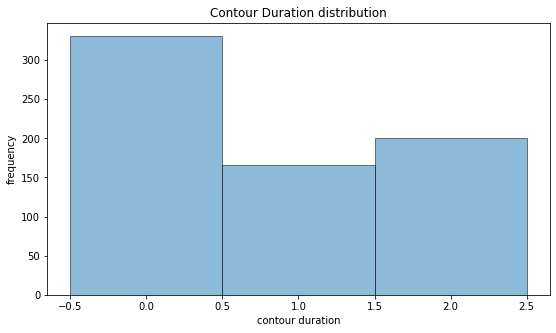

In [620]:
plt.figure(figsize=[9,5])
bins = range(0,4)

y = df_train['ContourGroup']
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', align='left')

plt.xlabel('contour duration')
plt.ylabel('frequency')
plt.title('Contour Duration distribution')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()


In [521]:
'''### SMOTE to over sample the training data
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()'''

"### SMOTE to over sample the training data\nfrom imblearn.over_sampling import SMOTE\nfrom collections import Counter\nfrom matplotlib import pyplot\n\noversample = SMOTE()\nX, y = oversample.fit_resample(X_train, y_train)\n# summarize distribution\ncounter = Counter(y)\nfor k,v in counter.items():\n    per = v / len(y) * 100\n    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))\n# plot the distribution\npyplot.bar(counter.keys(), counter.values())\npyplot.show()"

In [ ]:
X.shape


In [ ]:
y.shape

In [ ]:
'''
# use some features
X_names = ['TxFracs', 'TltDose', 'Categ_Standard 3','Categ_Urgent 2','Site_CNS', 'Site_GASTROINTESTINAL(GI)',
           'Site_BREAST','Site_ENT (HEAD & NECK)','Site_GENITOURINARY(GU)','Site_SARCOMA','Site_LUNG','Site_GYNAE']
X_train = df_train[X_names].values
y_train = df_train["ContourGroup"].values
X_test = df_test[X_names].values
y_test = df_test["ContourGroup"].values
'''

#### Decision Tree

In [127]:
X_train = df_train.drop("ContourGroup", axis=1).values
y_train = df_train["ContourGroup"].values
X_test = df_test.drop("ContourGroup", axis=1).values
y_test = df_test["ContourGroup"].values

In [128]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#mdl_dt = tree.DecisionTreeClassifier(max_depth=6)
#mdl_dt = mdl_dt.fit(X, y)

param_grid = {'max_depth': np.arange(3, 20),
              'max_features': np.arange(3,20),
              'min_samples_split': np.arange(2,10)
                  }
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_


{'max_depth': 3, 'max_features': 3, 'min_samples_split': 9}

In [129]:
from sklearn.metrics import confusion_matrix, classification_report
dtree_model = DecisionTreeClassifier(max_depth=GS.best_params_['max_depth'], 
                                     max_features=GS.best_params_['max_features'],
                                    min_samples_split=GS.best_params_['min_samples_split']).fit(X_train, y_train)
y_test_pred = dtree_model.predict(X_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)


In [130]:
print(cm)
print(classification_report(y_test, y_test_pred))


[[ 17  66   0]
 [ 17 156   3]
 [  5  39   0]]
              precision    recall  f1-score   support

         0.0       0.44      0.20      0.28        83
         1.0       0.60      0.89      0.71       176
         2.0       0.00      0.00      0.00        44

    accuracy                           0.57       303
   macro avg       0.34      0.36      0.33       303
weighted avg       0.47      0.57      0.49       303



In [131]:
dtree_model.score(X_train, y_train) # mean accuracy

0.5685997171145686

In [132]:
dtree_model.score(X_test, y_test)
# accuracy_score(y_test, y_test_pred)

0.570957095709571

In [133]:
df_train.head()

TltDose  TxFracs  Site_BREAST  Site_CNS  Site_ENDOCRINE  \
4781   3500.0     20.0            0         0               0   
469     800.0      1.0            0         0               0   
7849   4240.0     16.0            1         0               0   
8223   4005.0     15.0            1         0               0   
2206   7020.0     39.0            0         0               0   

      Site_ENT (HEAD & NECK)  Site_EYE  Site_GENITOURINARY(GU)  Site_GI LOWER  \
4781                       0         0                       0              0   
469                        0         0                       1              0   
7849                       0         0                       0              0   
8223                       0         0                       0              0   
2206                       0         0                       1              0   

      Site_GI UPPER  Site_GYNAE  Site_LUNG  Site_LYMPHOMA  Site_PAEDIATRIC  \
4781              0           0          0              1                0   
469               0           0          0              0                0   
7849              0           0          0              0                0   
8223              0           0          0              0                0   
2206              0           0          0              0                0   

      Site_SARCOMA  Site_SKIN  Categ_Emergency 1  Categ_Standard 3  \
4781             0          0                  0                 0   
469              0          0                  0                 0   
7849             0          0                  0                 1   
8223             0          0                  0                 1   
2206             0          0                  0                 1   

      Categ_Urgent 2  ContourGroup  
4781               1           0.0  
469                1           1.0  
7849               0           1.0  
8223               0           0.0  
2206               0           1.0

In [134]:
fn = df_train.drop("ContourGroup", axis=1).columns
cn=['fast','medium','slow']
fig = plt.figure(figsize=(50,20), dpi=400)
_ = tree.plot_tree(dtree_model, 
                   feature_names=fn,  
                   class_names=cn,
                   filled=True)

#### other classifiers

In [ ]:
'''
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

print(accuracy)
print(cm)
print(classification_report(y_test, svm_predictions))
'''

In [533]:
'''# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_train, y_train)
print("Training accuracy:" , accuracy)
  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)'''

Training accuracy: 0.703012912482066


In [538]:
'''test_score = knn.score(X_test, y_test)
print("testing accuracy:" , test_score)'''

testing accuracy: 0.63


In [539]:
'''print(cm)
print(classification_report(y_test, knn_predictions))'''

[[114  16   9]
 [ 16  30  27]
 [ 15  28  45]]
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.80       139
         1.0       0.41      0.41      0.41        73
         2.0       0.56      0.51      0.53        88

    accuracy                           0.63       300
   macro avg       0.58      0.58      0.58       300
weighted avg       0.63      0.63      0.63       300



In [530]:
'''# training a Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)'''

0.5033333333333333


#### random forest

In [135]:
### Random Forest
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf_rf = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_rf.fit(X_train,y_train)

y_pred = clf_rf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.504950495049505


In [136]:
target_y

'ContourDur'

In [137]:
df_test_copy[df_test_copy[target_y]<0]=0

<ipython-input-137-71766997b0e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test_copy[df_test_copy[target_y]<0]=0
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [141]:
df_test_copy[['ContourGroup']].head()

ContourGroup
2658           0.0
1787           0.0
4722           1.0
5984           1.0
5266           1.0

In [142]:
df_test_copy[df_test_copy['ContourGroup']==0][target_y].median()

0.0

In [143]:
df_test_copy[df_test_copy['ContourGroup']==1][target_y].median()

1.0

In [144]:
df_test_copy[df_test_copy['ContourGroup']==2][target_y].median()

4.0

In [145]:
y_test

array([0., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 2., 0., 2., 0., 0., 1., 0., 2., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 2., 0., 2., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 2., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 2., 0., 2., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 2.,
       1., 0., 1., 2., 1., 1., 1., 2., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       2., 0., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 2., 0., 0., 1., 2., 1., 0., 1., 2., 0., 1.,
       1., 1., 1., 1., 2., 0., 1., 1., 0., 0., 1., 0., 2., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 2., 1.,
       0., 2., 0., 1., 0., 1., 1., 1., 1., 1., 2., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 2., 1., 0., 1., 2., 2., 1., 2., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [146]:
y_test_pred

array([1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 2., 1., 1., 1., 2., 1., 1., 0., 1., 0., 1., 1.,
       2., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 0.

In [147]:
y_pred_days = []
for i in y_test_pred:
    if i == 0:
        y_pred_days.append(0)
    if i == 1:
        y_pred_days.append(2)
        
    if i==2:
        y_pred_days.append(7)
        

In [150]:
df_out = pd.DataFrame(y_pred_days,columns=['pred'])
df_out['test']=y_test_days
df_out.head()

pred  test
0     2   0.0
1     0   0.0
2     2   1.0
3     2   1.0
4     2   1.0

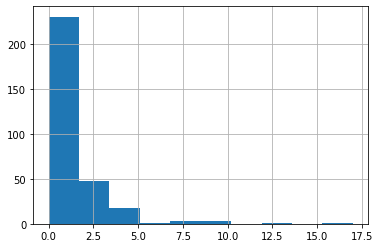

In [149]:
y_test_days = df_test_copy[target_y].values
df_test_copy[target_y].hist()

In [151]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_pred_days, df_test_copy[target_y].values)
print(mse)

4.508250825082508


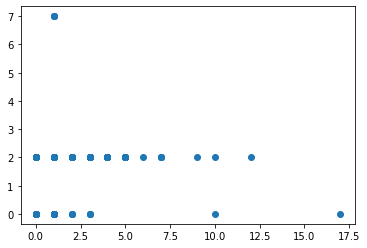

In [152]:
x=range(0, len(y_pred_days))
y=y_test_days
y2=y_pred_days
plt.scatter(y,y2)
#plt.scatter(x, y2)

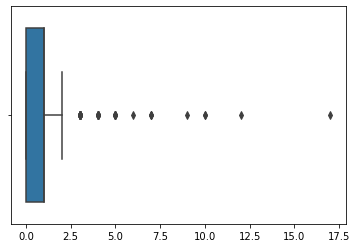

In [153]:
import seaborn as sns
sns.boxplot(x=y_test_days)

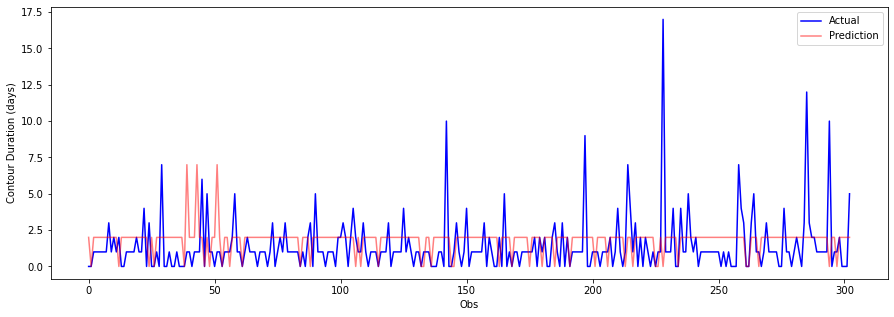

In [154]:
# Plot the y_test and the prediction (y_pred)
fig = plt.figure(figsize=(15, 5))
plt.plot(np.arange(0,len(y_test),1), y_test_days, 'b-', markersize=10, label='Actual')
plt.plot(np.arange(0,len(y_test),1), y_pred_days, 'r-', label='Prediction', alpha = 0.5)
plt.xlabel('Obs')
plt.ylabel('Contour Duration (days)')
#plt.ylim(-10, 20)
plt.legend(loc='upper right');

/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/fanjia/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#log

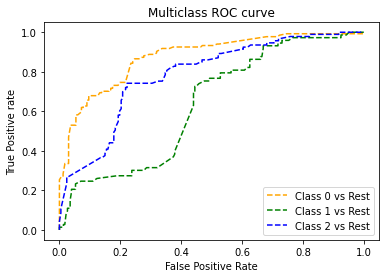

In [696]:
# multi-class classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# fit model
clf = OneVsRestClassifier(LogisticRegression())
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
pred_prob = clf.predict_proba(X_test)

# roc curve for classes
fpr = {}
tpr = {}
thresh ={}

n_class = 3

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    
# plotting    
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('Multiclass ROC',dpi=300); 

In [155]:
param_grid = {'max_depth': np.arange(3, 10),
              'max_features': np.arange(3,10)
              #'min_samples_split': np.arange(2,10)
                  }
GS = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid) #class_weight={1:1/360, 2:1/130, 3:1/130}),
GS.fit(X_train, y_train)
GS.best_params_

{'max_depth': 3, 'max_features': 3}

In [156]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [157]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [158]:
# evaluate random search
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

base_model = RandomForestClassifier(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_test, y_test)

'''Model Performance
Average Error: 3.9199 degrees.
Accuracy = 93.36%.'''



Model Performance
Average Error: 0.5611 degrees.
Accuracy = nan%.


<ipython-input-158-5a5e54b40bf3>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-158-5a5e54b40bf3>:5: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


'Model Performance\nAverage Error: 3.9199 degrees.\nAccuracy = 93.36%.'

In [159]:
base_model.score(X_test, y_test)

0.4884488448844885

In [160]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=80, max_features='sqrt', min_samples_leaf=4,
                       min_samples_split=5, n_estimators=1400)

In [161]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Model Performance
Average Error: 0.4884 degrees.
Accuracy = nan%.
Improvement of nan%.


<ipython-input-158-5a5e54b40bf3>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-158-5a5e54b40bf3>:5: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [162]:
rf_random.score(X_test, y_test)

0.5379537953795379

In [163]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [60, 80, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [10, 12, 15],
    'n_estimators': [100, 200, 300]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [164]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, X_test, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (grid_accuracy - base_accuracy) / base_accuracy))


Fitting 3 folds for each of 162 candidates, totalling 486 fits
Model Performance
Average Error: 0.4422 degrees.
Accuracy = nan%.
Improvement of nan%.


<ipython-input-158-5a5e54b40bf3>:5: RuntimeWarning: divide by zero encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)
<ipython-input-158-5a5e54b40bf3>:5: RuntimeWarning: invalid value encountered in true_divide
  mape = 100 * np.mean(errors / test_labels)


In [165]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 10,
 'n_estimators': 100}

In [166]:
grid_search.score(X_test, y_test)

0.5676567656765676

In [167]:
y_rf_pred=grid_search.predict(X_test)
cm_rf = confusion_matrix(y_test, y_rf_pred)

In [168]:
print(cm_rf)
print(classification_report(y_test, y_rf_pred))

[[  6  76   1]
 [ 11 156   9]
 [  2  32  10]]
              precision    recall  f1-score   support

         0.0       0.32      0.07      0.12        83
         1.0       0.59      0.89      0.71       176
         2.0       0.50      0.23      0.31        44

    accuracy                           0.57       303
   macro avg       0.47      0.40      0.38       303
weighted avg       0.50      0.57      0.49       303



In [169]:
df_test

TltDose  TxFracs  Site_BREAST  Site_CNS  Site_ENDOCRINE  \
2658    800.0      1.0            0         0               0   
1787   4240.0     16.0            1         0               0   
4722   2000.0      5.0            0         1               0   
5984   2000.0      5.0            0         0               0   
5266   2500.0     10.0            0         0               0   
...       ...      ...          ...       ...             ...   
1252   4800.0      4.0            0         0               0   
1352   4000.0      5.0            0         1               0   
2039    400.0      2.0            0         0               0   
4912   2000.0      5.0            0         0               0   
8548   7000.0     35.0            0         0               0   

      Site_ENT (HEAD & NECK)  Site_EYE  Site_GENITOURINARY(GU)  Site_GI LOWER  \
2658                       0         0                       0              0   
1787                       0         0                       0              0   
4722                       0         0                       0              0   
5984                       0         0                       0              0   
5266                       0         0                       0              0   
...                      ...       ...                     ...            ...   
1252                       0         0                       0              0   
1352                       0         0                       0              0   
2039                       0         0                       0              0   
4912                       0         0                       0              0   
8548                       1         0                       0              0   

      Site_GI UPPER  Site_GYNAE  Site_LUNG  Site_LYMPHOMA  Site_PAEDIATRIC  \
2658              0           0          1              0                0   
1787              0           0          0              0                0   
4722              0           0          0              0                0   
5984              0           0          0              1                0   
5266              0           0          1              0                0   
...             ...         ...        ...            ...              ...   
1252              0           0          1              0                0   
1352              0           0          0              0                0   
2039              0           0          0              1                0   
4912              0           0          1              0                0   
8548              0           0          0              0                0   

      Site_SARCOMA  Site_SKIN  Categ_Emergency 1  Categ_Standard 3  \
2658             0          0                  1                 0   
1787             0          0                  0                 1   
4722             0          0                  0                 1   
5984             0          0                  0                 0   
5266             0          0                  0                 1   
...            ...        ...                ...               ...   
1252             0          0                  0                 1   
1352             0          0                  0                 1   
2039             0          0                  0                 1   
4912             0          0                  0                 0   
8548             0          0                  0                 1   

      Categ_Urgent 2  ContourGroup  
2658               0           0.0  
1787               0           0.0  
4722               0           1.0  
5984               1           1.0  
5266               0           1.0  
...              ...           ...  
1252               0           1.0  
1352               0           0.0  
2039               0           0.0  
4912               1           0.0  
8548               0           2.0  

[303 rows x 20 columns]

In [170]:
y_test

array([0., 0., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 2., 0., 2., 0., 0., 1., 0., 2., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 1., 2., 0., 2., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 2., 1., 1., 0., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 2., 0., 1., 1., 1., 2., 1., 1., 1., 1., 1., 0.,
       1., 0., 1., 2., 0., 2., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 2.,
       1., 0., 1., 2., 1., 1., 1., 2., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       2., 0., 1., 1., 1., 1., 2., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 0., 2., 0., 0., 1., 2., 1., 0., 1., 2., 0., 1.,
       1., 1., 1., 1., 2., 0., 1., 1., 0., 0., 1., 0., 2., 0., 1., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 2., 1.,
       0., 2., 0., 1., 0., 1., 1., 1., 1., 1., 2., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 1., 0., 1., 2., 1., 0., 1., 2., 2., 1., 2., 0., 1., 0.,
       1., 1., 0., 1., 0.

In [171]:
y_rf_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 2., 1., 1., 1., 2., 2., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 2., 1., 1.,
       1., 2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 2., 1., 1., 1.

#### Planning wait

In [579]:
preTxDur.columns

Index(['MRN', 'CreatedDate', 'SiteGroup', 'Diagnosis', 'Category_x',
       'PlanCreateDate', 'Team', 'GTV/CTVPromtDate', 'GTV/CTVCompleteDate',
       'ReviewDatePlaner', 'Location_x', 'FinalPlanPromtDate',
       'FinalPlanCompleteDate', 'PlanReviewRequestDate',
       'PlanProgressReviewDate', 'eBookingReviDate', 'SimApptDt',
       'SimApptCreatedDt', 'SimLocation', 'CTWait', 'TxStartDt',
       'TxApptCreatedDt', 'Sitegroup_y', 'TltDose', 'TxFracs', 'TxUnit',
       'Intent', 'TotalWaitTime', 'ContourDur', 'TimeBtw_Sim_ContourCompl',
       'TimeBtw_Sim_BkTx', 'Tx-TxBook', 'PlanDur', 'ContourWait',
       'TxApptBook-Sim', 'z_score_contour'],
      dtype='object')

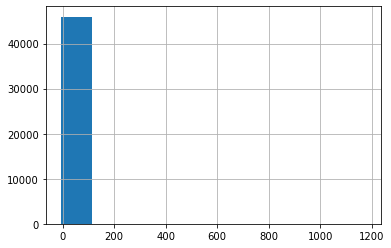

In [581]:
#remove outliers
preTxDur[preTxDur['Tx-TxBook']>-20]['Tx-TxBook'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[preTxDur['PlanningWait']>-20].PlanningWait
y = df_exceed[df_exceed['PlanningWait']>-20].PlanningWait
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning wait time frm contouring')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Planning time

In [ ]:
preTxDur[(preTxDur['PlanDur']>-20)&(preTxDur['PlanDur']<50)].PlanDur.hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['PlanDur']>-20)&(preTxDur['PlanDur']<20)].PlanDur
y = df_exceed[(df_exceed['PlanDur']>-20)&(df_exceed['PlanDur']<20)].PlanDur
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
y = df_exceed[(df_exceed['PlanDur']>-20)&(df_exceed['PlanDur']<20)].PlanDur
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')
plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning Durations')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
preTxDur[(preTxDur['PlanFinished_TxCreated']>-20)&(preTxDur['PlanFinished_TxCreated']<50)].PlanFinished_TxCreated.hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(-10,10)

x = preTxDur[(preTxDur['PlanFinished_TxCreated']>-20)&(preTxDur['PlanFinished_TxCreated']<50)].PlanFinished_TxCreated
y = df_exceed[(df_exceed['PlanFinished_TxCreated']>-20)&(df_exceed['PlanFinished_TxCreated']<50)].PlanFinished_TxCreated
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('Planning finished to treatment created')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

#### Seems the treatments are often pre-booked

In [ ]:
preTxDur[(preTxDur['WT Tx Frm Created']>-20)&(preTxDur['WT Tx Frm Created']<50)]['WT Tx Frm Created'].hist()


### Total pre-treatment time

In [ ]:
preTxDur['Tx-Sim']=pd.to_datetime(preTxDur['TxStartDt']).dt.date-pd.to_datetime(preTxDur['SimApptDt']).dt.date
preTxDur['Tx-Sim']=preTxDur['Tx-Sim'].dt.days
df_exceed['Tx-Sim']=pd.to_datetime(df_exceed['TxStartDt']).dt.date-pd.to_datetime(df_exceed['SimApptDt']).dt.date
df_exceed['Tx-Sim']=df_exceed['Tx-Sim'].dt.days

In [ ]:
preTxDur['Tx-Sim'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['Tx-Sim']>-20)&(preTxDur['Tx-Sim']<50)]['Tx-Sim']
y = df_exceed[(df_exceed['Tx-Sim']>-20)&(df_exceed['Tx-Sim']<50)]['Tx-Sim']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number')
plt.title('Time between Tx and Sim')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(0,10)

x = preTxDur[(preTxDur['Tx-TxBook']>-20)&(preTxDur['Tx-TxBook']<50)]['Tx-TxBook']
y = df_exceed[(df_exceed['Tx-TxBook']>-20)&(df_exceed['Tx-TxBook']<50)]['Tx-TxBook']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number')
plt.title('Time between Tx and TxBook')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [ ]:
preTxDur[(preTxDur['prebook frm CT']>-20)&(preTxDur['prebook frm CT']<50)]['prebook frm CT'].hist()

In [ ]:
plt.figure(figsize=[9,5])
bins = range(-10,17)

x = preTxDur[(preTxDur['prebook frm CT']>-20)&(preTxDur['prebook frm CT']<50)]['prebook frm CT']
y = df_exceed[(df_exceed['prebook frm CT']>-20)&(df_exceed['prebook frm CT']<50)]['prebook frm CT']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number of treatments')
plt.title('preBook Frm CTAppt')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show()

In [ ]:
preTxDur['PlanFinish_TxStart'] = preTxDur['TxStartDt'] - preTxDur['FinalPlanCompleteDate']
preTxDur['PlanFinish_TxStart']=preTxDur['PlanFinish_TxStart'].dt.days
df_exceed['PlanFinish_TxStart'] = df_exceed['TxStartDt'] - df_exceed['FinalPlanCompleteDate']
df_exceed['PlanFinish_TxStart']=df_exceed['PlanFinish_TxStart'].dt.days
preTxDur[(preTxDur['PlanFinish_TxStart']>-50)&(preTxDur['PlanFinish_TxStart']<50)]['PlanFinish_TxStart'].hist();

In [ ]:
plt.figure(figsize=[9,5])
bins = range(-10,17)

x = preTxDur[(preTxDur['PlanFinish_TxStart']>-100)&(preTxDur['PlanFinish_TxStart']<100)]['PlanFinish_TxStart']
y = df_exceed[(df_exceed['PlanFinish_TxStart']>-100)&(df_exceed['PlanFinish_TxStart']<100)]['PlanFinish_TxStart']
plt.hist(x, bins = bins, alpha=0.5, edgecolor='black', label='all', align='left')
plt.hist(y, bins = bins, alpha=0.5, edgecolor='black', label='exceed', align='left')


plt.legend(loc='upper right')

plt.xlabel('time')
plt.ylabel('Number')
plt.title('Time btw PlanComplete and TxStart')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.show();

In [ ]:
# box plots of pretreatment duration of all patients based on intent
data_list=[]
intents=preTxDur['Intent'].unique()
for i in intents:
    data=preTxDur[preTxDur['Intent']==i]['Tx-Sim']
    data_list.append(data)

fig = plt.figure(figsize =(7,5)) 
  
# Creating axes instance 
ax = fig.add_axes([0, 0, 1, 1]) 
  
# Creating plot 
bp = ax.boxplot(data_list,labels=intents) 
plt.axhline(y=14, color='r', linestyle='-',lw=1)  
ax.set_title('pre-Tx durations for diff intents')
# show plot 
plt.show()